# ⚛️ 1D Quantum System Solver and Visualizer

---

## 📖 Project Overview

This comprehensive notebook explores the **1D Particle in a Box (PIAB)** quantum system through computational physics and data visualization. It's designed for students, researchers, and anyone interested in quantum mechanics.

### 🎯 Learning Outcome :
While making this project , we did :
- ✅ Understand fundamental quantum mechanics concepts (quantization, wave-particle duality, probability)
- ✅ Implement numerical solutions to the Schrödinger equation
- ✅ Master scientific Python libraries (NumPy, SciPy, Matplotlib)
- ✅ Connect quantum theory to real chemistry (molecular orbitals, spectroscopy)
- ✅ Develop data visualization and computational skills

### 🚀 Key Features:
1. **Energy & Wave Function Calculator** - Compute exact quantum states
2. **Interactive Visualizations** - Beautiful plots of ψ(x) and |ψ(x)|²
3. **Probability Analysis** - Calculate probability in any region
4. **Time Evolution Animation** - Watch quantum states evolve in time
5. **Superposition States** - Explore quantum interference 
6. **Expectation Values** - Calculate <x>, <p>, <E>, and uncertainties
7. **HOMO-LUMO Analysis** - Model molecular electronic transitions
8. **3D Surface Plots** - Visualize probability evolution
9. **Comparison Tools** - Analyze multiple states simultaneously

### 💻 Libraries Used:
| Library | Purpose |
|---------|--------|
| **NumPy** | Array operations, mathematical functions |
| **SciPy** | Numerical integration, advanced calculations |
| **Matplotlib** | 2D plotting and visualization |
| **Seaborn** | Enhanced statistical visualizations |
| **Pandas** | Data organization and export |

---

**Author**: Quantum Computing Lab  
**Version**: 2.0 (Enhanced Edition)  
**Last Updated**: November 2025

---

## 📦 1. Setup: Import Required Libraries

### 📝 Explanation:
We'll import all necessary Python libraries for scientific computing and visualization. Each library serves a specific purpose:

- **NumPy**: The foundation for numerical computing in Python. We'll use it for:
  - Creating arrays and grids (`np.linspace`, `np.arange`)
  - Mathematical operations (`np.sin`, `np.cos`, `np.sqrt`, `np.exp`)
  - Complex number handling for time evolution

- **SciPy**: Provides advanced scientific functions:
  - `integrate.quad`: Numerical integration for probability calculations
  - Scientific constants and special functions

- **Matplotlib**: The primary plotting library:
  - `pyplot`: Main plotting interface
  - `animation`: For time-dependent visualizations
  - Customizable figures, subplots, and styling

- **Seaborn**: Built on Matplotlib, provides:
  - Beautiful default color palettes
  - Statistical visualization enhancements

- **Pandas**: For data management:
  - Organizing results into tables
  - Exporting data to CSV/Excel formats

### 🎯 What Happens in This Cell:
1. All libraries are imported with standard aliases (np, plt, pd, sns)
2. Warnings are suppressed for cleaner output
3. Matplotlib style is configured for publication-quality plots
4. Success message confirms all imports worked correctly

In [1]:
# Core scientific computing libraries
import numpy as np
import pandas as pd
from scipy import integrate
from scipy.integrate import quad

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# System libraries
import warnings
import os
from IPython.display import HTML, display

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set high-quality plot defaults
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (10, 6)

# Physical constants (atomic units where ℏ = m = 1)
HBAR = 1.0  # Reduced Planck constant
MASS = 1.0  # Particle mass

print("="*80)
print("✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("="*80)
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print("\n🎨 Visualization settings configured for high-quality output")
print("🔬 Physical constants set to atomic units (ℏ = m = 1)")
print("\n" + "="*80)

✅ ALL LIBRARIES IMPORTED SUCCESSFULLY!
NumPy version: 2.1.3
Pandas version: 2.2.3
Matplotlib version: 3.10.0

🎨 Visualization settings configured for high-quality output
🔬 Physical constants set to atomic units (ℏ = m = 1)



## 🧮 2. Theoretical Foundation

### 📚 The Schrödinger Equation

The time-independent Schrödinger equation describes quantum systems:

$$\hat{H}\psi(x) = E\psi(x)$$

where $\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)$ is the Hamiltonian operator.

### 📦 Particle in a Box (PIAB) Model

#### Potential Energy:
$$V(x) = \begin{cases} 
0 & \text{if } 0 \leq x \leq L \\
\infty & \text{otherwise}
\end{cases}$$

**Physical Interpretation**: The particle is completely confined to the box. The infinite walls mean the particle has **zero probability** of being found outside [0, L].

#### Boundary Conditions:
- $\psi(0) = 0$ and $\psi(L) = 0$ (wave function must vanish at walls)
- $\psi(x)$ must be continuous and normalizable

---

## 🔑 Key Formulas (Exact Solutions)

### 1️⃣ Energy Eigenvalues
$$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2} = \frac{n^2 h^2}{8mL^2}$$

where:
- $n = 1, 2, 3, \ldots$ (quantum number, $n \geq 1$)
- $h$ is Planck's constant, $\hbar = h/(2\pi)$
- $m$ is the particle mass
- $L$ is the box length

**Key Insight**: Energy is **quantized** (discrete levels only). Energy scales as $E_n \propto n^2$, so higher states are much more energetic.

### 2️⃣ Normalized Wave Functions
$$\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) \quad \text{for } 0 \leq x \leq L$$

**Physical Meaning**: 
- The $\sqrt{2/L}$ factor ensures normalization: $\int_0^L |\psi_n(x)|^2 dx = 1$
- The sine function creates standing waves with $n-1$ nodes (zero crossings)
- Higher $n$ means shorter wavelength and more oscillations

### 3️⃣ Probability Density
$$|\psi_n(x)|^2 = \frac{2}{L} \sin^2\left(\frac{n\pi x}{L}\right)$$

**Born Interpretation**: $|\psi_n(x)|^2$ gives the **probability density** of finding the particle at position $x$.

### 4️⃣ Probability in a Region
$$P(x_1 \leq x \leq x_2) = \int_{x_1}^{x_2} |\psi_n(x)|^2 \, dx$$

This is the probability of finding the particle between $x_1$ and $x_2$.

### 5️⃣ Time Evolution (New!)
$$\Psi_n(x,t) = \psi_n(x) e^{-iE_n t/\hbar}$$

The time-dependent wave function shows how quantum states evolve. The $e^{-iE_n t/\hbar}$ phase factor causes oscillations.

### 6️⃣ Superposition State (New!)
$$\Psi(x,t) = \sum_{n} c_n \psi_n(x) e^{-iE_n t/\hbar}$$

where $c_n$ are complex coefficients with $\sum_n |c_n|^2 = 1$. This creates quantum interference patterns.

---

## 📊 Important Quantum Properties

### Expectation Values:
- **Position**: $\langle x \rangle = \int_0^L x |\psi_n(x)|^2 dx = L/2$ (symmetry!)
- **Momentum**: $\langle p \rangle = 0$ (particle equally likely moving left/right)
- **Energy**: $\langle E \rangle = E_n$ (energy eigenstate)

### Uncertainty Principle:
$$\Delta x \cdot \Delta p \geq \frac{\hbar}{2}$$

We'll calculate these values to verify Heisenberg's uncertainty principle!

---

## 🔧 3. Core Functions: Energy and Wave Functions

### 📝 Detailed Explanation:

We'll implement three fundamental calculation functions:

#### **Function 1: `calculate_energy(n, L, factor)`**
**Purpose**: Compute the energy eigenvalue for quantum state $n$

**Mathematics**: $E_n = \text{factor} \times \frac{n^2}{L^2}$

**Parameters**:
- `n`: Quantum number (integer ≥ 1)
- `L`: Box length (default 1.0 in atomic units)
- `factor`: Energy scaling factor $\frac{h^2}{8m}$ (default 1.0)

**Returns**: Float representing energy in atomic units

**Why it matters**: Demonstrates energy quantization - only specific discrete energies are allowed!

---

#### **Function 2: `calculate_wavefunction(x, n, L)`**
**Purpose**: Compute the wave function $\psi_n(x)$ at position(s) $x$

**Mathematics**: $\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right)$

**Key Implementation Details**:
1. Converts input to NumPy array for vectorization (fast computation)
2. Initializes result array with zeros
3. Uses boolean masking to apply formula only inside box [0, L]
4. Returns zero outside the box (infinite potential walls)

**Returns**: Array of wave function values

---

#### **Function 3: `calculate_probability_density(x, n, L)`**
**Purpose**: Compute probability density $|\psi_n(x)|^2$

**Mathematics**: Simply the square of the wave function

**Physical Meaning**: 
- Large $|\psi|^2$ → high probability of finding particle
- Small $|\psi|^2$ → low probability
- Zero $|\psi|^2$ → impossible to find particle (nodes)

**Returns**: Array of probability density values

In [2]:
def calculate_energy(n, L=1.0, factor=1.0):
    """
    Calculate the energy eigenvalue E_n for the particle in a box.
    
    Parameters:
    -----------
    n : int
        Quantum number (n >= 1). Represents the energy level.
    L : float, optional
        Length of the box in atomic units (default: 1.0)
    factor : float, optional
        Energy scale factor h²/(8m) (default: 1.0 for atomic units)
    
    Returns:
    --------
    float
        Energy eigenvalue E_n in atomic units
        
    Raises:
    -------
    ValueError
        If n < 1 (quantum number must be positive)
    
    Example:
    --------
    >>> E1 = calculate_energy(1, L=1.0)  # Ground state energy
    >>> print(f"Ground state energy: {E1}")
    """
    if n < 1:
        raise ValueError("❌ Quantum number n must be >= 1")
    
    # E_n = (n² × π² × ℏ²) / (2mL²)
    # In atomic units with factor = 1: E_n = n² / L²
    return factor * (n**2) / (L**2)


def calculate_wavefunction(x, n, L=1.0):
    """
    Calculate the normalized wave function ψ_n(x) for the particle in a box.
    
    The wave function is zero outside [0, L] due to infinite potential walls.
    Inside the box, it follows: ψ_n(x) = √(2/L) × sin(nπx/L)
    
    Parameters:
    -----------
    x : float or array-like
        Position value(s) at which to evaluate the wave function
    n : int
        Quantum number (n >= 1)
    L : float, optional
        Length of the box (default: 1.0)
    
    Returns:
    --------
    ndarray
        Wave function values at position(s) x
        
    Notes:
    ------
    - The wave function has (n-1) nodes (zero crossings) inside the box
    - Normalization: ∫₀ᴸ |ψ_n(x)|² dx = 1
    
    Example:
    --------
    >>> x_points = np.linspace(0, 1, 100)
    >>> psi = calculate_wavefunction(x_points, n=2, L=1.0)
    """
    x = np.asarray(x)  # Convert to NumPy array for vectorization
    psi = np.zeros_like(x, dtype=float)  # Initialize with zeros
    
    # Apply wave function only inside the box [0, L]
    mask = (x >= 0) & (x <= L)
    psi[mask] = np.sqrt(2/L) * np.sin(n * np.pi * x[mask] / L)
    
    return psi


def calculate_probability_density(x, n, L=1.0):
    """
    Calculate the probability density |ψ_n(x)|² for the particle in a box.
    
    This gives the probability per unit length of finding the particle at position x.
    
    Parameters:
    -----------
    x : float or array-like
        Position value(s)
    n : int
        Quantum number (n >= 1)
    L : float, optional
        Length of the box (default: 1.0)
    
    Returns:
    --------
    ndarray
        Probability density values at position(s) x
        
    Notes:
    ------
    - Total probability: ∫₀ᴸ |ψ_n(x)|² dx = 1
    - Higher values → more likely to find particle there
    - Nodes → zero probability (particle never found there)
    
    Example:
    --------
    >>> prob = calculate_probability_density(0.5, n=1, L=1.0)
    >>> print(f"Probability density at center: {prob}")
    """
    psi = calculate_wavefunction(x, n, L)
    return psi**2  # |ψ|² = ψ × ψ* (real wave function, so ψ* = ψ)


# ============================================================================
# TESTING THE FUNCTIONS
# ============================================================================

print("\n" + "="*80)
print("🧪 TESTING CORE FUNCTIONS")
print("="*80)

# Test energy calculation
print("\n1️⃣ Energy Eigenvalues (L = 1.0 a.u.):")
print("-" * 50)
for n in range(1, 6):
    E_n = calculate_energy(n, L=1.0)
    print(f"   n = {n}  →  E_{n} = {E_n:8.4f} a.u.  (= {n}² = {n**2})")

print("\n   ✓ Energy increases as n² (quadratic scaling)")

# Test wave function
print("\n2️⃣ Wave Function at Specific Points:")
print("-" * 50)
x_test = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
psi_2 = calculate_wavefunction(x_test, n=2, L=1.0)
print(f"   ψ₂(x) at x = {x_test}")
print(f"   Values: {psi_2}")
print(f"\n   ✓ Note: ψ(0) = ψ(L) = 0 (boundary conditions satisfied)")

# Test probability density and normalization
print("\n3️⃣ Probability Density and Normalization:")
print("-" * 50)
x_grid = np.linspace(0, 1.0, 1000)
prob_density = calculate_probability_density(x_grid, n=1, L=1.0)
normalization = np.trapz(prob_density, x_grid)
print(f"   Normalization for n=1: ∫|ψ₁|² dx = {normalization:.6f}")
print(f"   Expected value: 1.000000")
print(f"   Error: {abs(normalization - 1.0):.2e}")
print(f"\n   ✓ Wave function is properly normalized!")

print("\n" + "="*80)
print("✅ ALL CORE FUNCTIONS WORKING CORRECTLY!")
print("="*80 + "\n")


🧪 TESTING CORE FUNCTIONS

1️⃣ Energy Eigenvalues (L = 1.0 a.u.):
--------------------------------------------------
   n = 1  →  E_1 =   1.0000 a.u.  (= 1² = 1)
   n = 2  →  E_2 =   4.0000 a.u.  (= 2² = 4)
   n = 3  →  E_3 =   9.0000 a.u.  (= 3² = 9)
   n = 4  →  E_4 =  16.0000 a.u.  (= 4² = 16)
   n = 5  →  E_5 =  25.0000 a.u.  (= 5² = 25)

   ✓ Energy increases as n² (quadratic scaling)

2️⃣ Wave Function at Specific Points:
--------------------------------------------------
   ψ₂(x) at x = [0.   0.25 0.5  0.75 1.  ]
   Values: [ 0.00000000e+00  1.41421356e+00  1.73191211e-16 -1.41421356e+00
 -3.46382422e-16]

   ✓ Note: ψ(0) = ψ(L) = 0 (boundary conditions satisfied)

3️⃣ Probability Density and Normalization:
--------------------------------------------------
   Normalization for n=1: ∫|ψ₁|² dx = 1.000000
   Expected value: 1.000000
   Error: 2.22e-16

   ✓ Wave function is properly normalized!

✅ ALL CORE FUNCTIONS WORKING CORRECTLY!



## 📊 4. Visualization Function: Beautiful Quantum Plots

### 📝 Detailed Explanation:

The `plot_piab()` function creates **publication-quality visualizations** of quantum states.

#### **What This Function Does**:

1. **Creates Spatial Grid**: 
   - Uses `np.linspace(0, L, num_points)` to create evenly spaced points
   - More points = smoother curves (default: 500)

2. **Computes Quantum Properties**:
   - Wave function $\psi_n(x)$ at all grid points
   - Probability density $|\psi_n(x)|^2$
   - Energy eigenvalue $E_n$

3. **Creates Side-by-Side Plots**:
   - **Left Panel**: Wave function (can be positive or negative)
   - **Right Panel**: Probability density (always positive)

4. **Visual Elements Added**:
   - Boundary markers (dotted lines at x=0 and x=L)
   - Zero reference line (dashed gray)
   - Shaded areas under curves
   - Grid for easier reading
   - Title with quantum number and energy

5. **Prints Additional Info**:
   - Quantum state details
   - Number of nodes (n-1)
   - Normalization check

#### **Why Two Plots?**
- **ψ(x)**: Shows the actual quantum state (complex amplitude)
- **|ψ(x)|²**: Shows measurable probability (what experiments detect)

The wave function can be negative, but probability is always positive!

In [3]:
def plot_piab(n, L=1.0, num_points=500, save_fig=False, filename=None):
    """
    Create beautiful side-by-side visualizations of wave function and probability density.
    
    This function generates publication-quality plots showing both the wave function
    and probability density for a given quantum state.
    
    Parameters:
    -----------
    n : int
        Quantum number (n >= 1)
    L : float, optional
        Length of the box (default: 1.0)
    num_points : int, optional
        Number of points for smooth plotting (default: 500)
    save_fig : bool, optional
        Whether to save the figure to file (default: False)
    filename : str, optional
        Custom filename for saving (default: auto-generated)
    
    Returns:
    --------
    None (displays plot and prints information)
    
    Example:
    --------
    >>> plot_piab(n=3, L=1.0)  # Plot third energy level
    """
    # Create spatial grid
    x = np.linspace(0, L, num_points)
    
    # Calculate quantum properties
    psi_n = calculate_wavefunction(x, n, L)
    prob_density = calculate_probability_density(x, n, L)
    E_n = calculate_energy(n, L)
    
    # Create figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Main title with quantum state info
    fig.suptitle(f'1D Particle in a Box: Quantum State n = {n} | Energy E₍ₙ₎ = {E_n:.4f} a.u.', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # ========== LEFT PLOT: Wave Function ψ_n(x) ==========
    ax[0].plot(x, psi_n, linewidth=2.5, color='#2E86DE', label=r'$\psi_n(x)$', zorder=3)
    
    # Add reference lines
    ax[0].axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    ax[0].axvline(0, color='black', linestyle=':', linewidth=1.5, zorder=2)
    ax[0].axvline(L, color='black', linestyle=':', linewidth=1.5, zorder=2)
    
    # Fill area under curve
    ax[0].fill_between(x, psi_n, alpha=0.2, color='#2E86DE', zorder=1)
    
    # Styling
    ax[0].set_title(r'Wave Function $\psi_n(x)$', fontsize=14, fontweight='bold', pad=10)
    ax[0].set_xlabel('Position x (a.u.)', fontsize=12)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    ax[0].grid(True, linestyle='dotted', alpha=0.6, zorder=0)
    ax[0].legend(fontsize=11, loc='upper right', framealpha=0.9)
    ax[0].set_xlim(-0.05*L, 1.05*L)
    
    # ========== RIGHT PLOT: Probability Density |ψ_n(x)|² ==========
    ax[1].plot(x, prob_density, linewidth=2.5, color='#EE5A6F', label=r'$|\psi_n(x)|^2$', zorder=3)
    
    # Add boundary markers
    ax[1].axvline(0, color='black', linestyle=':', linewidth=1.5, zorder=2)
    ax[1].axvline(L, color='black', linestyle=':', linewidth=1.5, zorder=2)
    
    # Fill probability region
    ax[1].fill_between(x, prob_density, color='#EE5A6F', alpha=0.4, zorder=1)
    
    # Styling
    ax[1].set_title(r'Probability Density $|\psi_n(x)|^2$', fontsize=14, fontweight='bold', pad=10)
    ax[1].set_xlabel('Position x (a.u.)', fontsize=12)
    ax[1].set_ylabel('Probability Density (a.u.⁻¹)', fontsize=12)
    ax[1].grid(True, linestyle='dotted', alpha=0.6, zorder=0)
    ax[1].legend(fontsize=11, loc='upper right', framealpha=0.9)
    ax[1].set_xlim(-0.05*L, 1.05*L)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save figure if requested
    if save_fig:
        if filename is None:
            filename = f'quantum_state_n{n}_L{L:.1f}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"   💾 Figure saved as: {filename}")
    
    plt.show()
    
    # ========== PRINT DETAILED INFORMATION ==========
    print(f"\n{'='*80}")
    print(f"📊 QUANTUM STATE INFORMATION")
    print(f"{'='*80}")
    print(f"  🔢 Quantum Number: n = {n}")
    print(f"  ⚡ Energy Level: E₍{n}₎ = {E_n:.6f} a.u.")
    print(f"  📏 Box Length: L = {L:.4f} a.u.")
    print(f"  🎯 Number of Nodes: {n-1} (zero crossings inside the box)")
    
    # Wavelength analysis
    wavelength = 2*L / n
    print(f"  🌊 De Broglie Wavelength: λ = {wavelength:.4f} a.u.")
    
    # Normalization check
    normalization = np.trapz(prob_density, x)
    print(f"  ✓ Normalization Check: ∫|ψ|²dx = {normalization:.6f} (should be 1.0)")
    
    if abs(normalization - 1.0) < 1e-4:
        print(f"    Status: ✅ Properly normalized")
    else:
        print(f"    Status: ⚠️ Normalization error: {abs(normalization - 1.0):.2e}")
    
    # Maximum probability location
    max_prob_idx = np.argmax(prob_density)
    max_prob_location = x[max_prob_idx]
    max_prob_value = prob_density[max_prob_idx]
    print(f"  📍 Maximum Probability at: x = {max_prob_location:.4f} a.u.")
    print(f"     (Probability density = {max_prob_value:.4f} a.u.⁻¹)")
    
    print(f"{'='*80}\n")

print("✅ Visualization function `plot_piab()` defined successfully!")
print("   Use: plot_piab(n, L, save_fig=True) to save high-quality figures\n")

✅ Visualization function `plot_piab()` defined successfully!
   Use: plot_piab(n, L, save_fig=True) to save high-quality figures



## 🎯 5. Probability Calculation in Specific Regions

### 📝 Detailed Explanation:

This section implements **numerical integration** to calculate probabilities.

#### **The Mathematical Problem**:
To find the probability of locating the particle between positions $x_1$ and $x_2$:

$$P(x_1 \leq x \leq x_2) = \int_{x_1}^{x_2} |\psi_n(x)|^2 \, dx$$

This integral usually **cannot be solved analytically** (except for special cases), so we use **numerical integration**.

#### **The Numerical Solution**:
We use SciPy's `quad()` function, which implements **adaptive Gaussian quadrature**:
- Automatically adjusts step size for accuracy
- Returns both result and error estimate
- Handles smooth functions efficiently

#### **Two Functions Provided**:

**1. `calculate_probability_in_region(n, L, x1, x2)`**
- Performs the numerical integration
- Validates input (region must be inside box)
- Returns (probability, error_estimate)

**2. `visualize_probability_region(n, L, x1, x2)`**
- Calls the calculation function
- Creates a visual plot highlighting the region
- Shows the probability as colored area
- Prints detailed results

#### **Why This Matters**:
In quantum mechanics, we can only predict **probabilities**, not exact positions. This function calculates those probabilities precisely!

In [4]:
def calculate_probability_in_region(n, L, x1, x2):
    """
    Calculate probability of finding particle in region [x1, x2] using numerical integration.
    
    Uses SciPy's adaptive quadrature (quad) for accurate integration:
    P = ∫(x1 to x2) |ψ_n(x)|² dx
    
    Parameters:
    -----------
    n : int
        Quantum number (n >= 1)
    L : float
        Length of the box
    x1 : float
        Start of the region (must be >= 0)
    x2 : float
        End of the region (must be <= L)
    
    Returns:
    --------
    tuple (float, float)
        (probability, integration_error)
        
    Raises:
    -------
    ValueError
        If region is outside box boundaries
    
    Example:
    --------
    >>> prob, err = calculate_probability_in_region(2, 1.0, 0.25, 0.75)
    >>> print(f"Probability in middle half: {prob:.4f} ± {err:.2e}")
    """
    # Input validation
    if not (0 <= x1 < x2 <= L):
        raise ValueError(
            f"❌ Region [{x1}, {x2}] must be strictly within box boundaries [0, {L}]\n"
            f"   Requirements: 0 <= x1 < x2 <= L"
        )
    
    # Define the integrand: |ψ_n(x)|²
    # Note: quad expects a function of single variable
    def integrand(x):
        psi_at_x = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        return psi_at_x**2
    
    # Perform numerical integration
    # quad returns (result, error_estimate)
    probability, error = quad(integrand, x1, x2)
    
    return probability, error


def visualize_probability_region(n, L, x1, x2, save_fig=False, filename=None):
    """
    Visualize probability density with highlighted region of interest.
    
    Creates a plot showing the full probability density and highlights
    the specific region where probability is being calculated.
    
    Parameters:
    -----------
    n : int
        Quantum number
    L : float
        Box length
    x1, x2 : float
        Region boundaries
    save_fig : bool, optional
        Save figure to file (default: False)
    filename : str, optional
        Custom filename for saving
    
    Example:
    --------
    >>> visualize_probability_region(3, 1.0, 0.3, 0.7)
    """
    # Calculate probability
    probability, error = calculate_probability_in_region(n, L, x1, x2)
    
    # Create spatial grid
    x = np.linspace(0, L, 500)
    prob_density = calculate_probability_density(x, n, L)
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Plot full probability density
    plt.plot(x, prob_density, linewidth=2.5, color='#2E86DE', 
             label=r'$|\psi_n(x)|^2$ (full)', zorder=2)
    
    # Highlight the region of interest
    x_region = x[(x >= x1) & (x <= x2)]
    prob_region = prob_density[(x >= x1) & (x <= x2)]
    plt.fill_between(x_region, prob_region, color='#10AC84', alpha=0.6, 
                     label=f'Region [{x1:.3f}, {x2:.3f}]\nP = {probability:.4f}', 
                     zorder=3)
    
    # Add region boundary markers
    plt.axvline(x1, color='red', linestyle='--', linewidth=2, alpha=0.7, 
                label=f'x₁ = {x1:.3f}', zorder=4)
    plt.axvline(x2, color='red', linestyle='--', linewidth=2, alpha=0.7, 
                label=f'x₂ = {x2:.3f}', zorder=4)
    
    # Add box boundaries
    plt.axvline(0, color='black', linestyle=':', linewidth=1.5, zorder=1)
    plt.axvline(L, color='black', linestyle=':', linewidth=1.5, zorder=1)
    
    # Styling
    plt.title(f'Probability in Region [{x1:.3f}, {x2:.3f}] | n = {n} | P = {probability:.4f} ({probability*100:.2f}%)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Position x (a.u.)', fontsize=12)
    plt.ylabel('Probability Density (a.u.⁻¹)', fontsize=12)
    plt.grid(True, linestyle='dotted', alpha=0.6, zorder=0)
    plt.legend(fontsize=11, loc='upper right', framealpha=0.9)
    plt.xlim(-0.05*L, 1.05*L)
    plt.ylim(bottom=0)
    plt.tight_layout()
    
    # Save if requested
    if save_fig:
        if filename is None:
            filename = f'probability_region_n{n}_x{x1:.2f}-{x2:.2f}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"   💾 Figure saved as: {filename}")
    
    plt.show()
    
    # Print detailed results
    print(f"\n{'='*80}")
    print(f"🎯 PROBABILITY CALCULATION RESULTS")
    print(f"{'='*80}")
    print(f"  Quantum State: n = {n}")
    print(f"  Box Length: L = {L:.4f} a.u.")
    print(f"  Region: [{x1:.4f}, {x2:.4f}] a.u.")
    print(f"  Region Width: Δx = {x2-x1:.4f} a.u.")
    print(f"\n  📊 Results:")
    print(f"     Probability: P = {probability:.6f} ({probability*100:.4f}%)")
    print(f"     Integration Error: ±{error:.2e}")
    print(f"\n  💡 Interpretation:")
    print(f"     There is a {probability*100:.2f}% chance of finding the particle")
    print(f"     in the region from x = {x1} to x = {x2}")
    print(f"{'='*80}\n")

print("✅ Probability calculation functions defined successfully!")
print("   Use: calculate_probability_in_region() for numerical result")
print("   Use: visualize_probability_region() for visual analysis\n")

✅ Probability calculation functions defined successfully!
   Use: calculate_probability_in_region() for numerical result
   Use: visualize_probability_region() for visual analysis



## ⭐ 6. NEW FEATURE: Expectation Values & Uncertainty

### 📝 Detailed Explanation:

In quantum mechanics, we calculate **expectation values** - the average value we'd measure over many experiments.

#### **Position Expectation Value**:
$$\langle x \rangle = \int_0^L x |\psi_n(x)|^2 dx$$

For a symmetric box, this should equal $L/2$ (center) due to symmetry.

#### **Position Squared Expectation**:
$$\langle x^2 \rangle = \int_0^L x^2 |\psi_n(x)|^2 dx$$

Needed to calculate uncertainty.

#### **Position Uncertainty**:
$$\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}$$

Measures the "spread" in position measurements.

#### **Momentum Uncertainty** (from analytical formula):
$$\Delta p = \frac{n\pi\hbar}{L}$$

#### **Heisenberg Uncertainty Principle**:
$$\Delta x \cdot \Delta p \geq \frac{\hbar}{2}$$

We'll verify this fundamental quantum limit!

In [5]:
def calculate_expectation_values(n, L=1.0):
    """
    Calculate expectation values and uncertainties for position and momentum.
    
    Computes:
    - <x>: Average position
    - <x²>: Average of position squared
    - Δx: Position uncertainty (standard deviation)
    - Δp: Momentum uncertainty
    - Δx·Δp: Uncertainty product (should be >= ℏ/2)
    
    Parameters:
    -----------
    n : int
        Quantum number
    L : float, optional
        Box length (default: 1.0)
    
    Returns:
    --------
    dict
        Dictionary containing all expectation values and uncertainties
    
    Example:
    --------
    >>> results = calculate_expectation_values(1, L=1.0)
    >>> print(f"Position uncertainty: {results['delta_x']:.4f}")
    """
    # Define integrand for <x>
    def integrand_x(x):
        psi = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        return x * psi**2
    
    # Define integrand for <x²>
    def integrand_x2(x):
        psi = np.sqrt(2/L) * np.sin(n * np.pi * x / L)
        return x**2 * psi**2
    
    # Calculate expectation values using numerical integration
    expectation_x, _ = quad(integrand_x, 0, L)
    expectation_x2, _ = quad(integrand_x2, 0, L)
    
    # Calculate position uncertainty
    delta_x = np.sqrt(expectation_x2 - expectation_x**2)
    
    # Momentum uncertainty (analytical formula)
    # Δp = nπℏ/L in atomic units where ℏ = 1
    delta_p = n * np.pi * HBAR / L
    
    # Uncertainty product
    uncertainty_product = delta_x * delta_p
    
    # Heisenberg limit
    heisenberg_limit = HBAR / 2
    
    # Energy expectation value (exact for eigenstates)
    expectation_E = calculate_energy(n, L)
    
    return {
        'n': n,
        'L': L,
        'expectation_x': expectation_x,
        'expectation_x2': expectation_x2,
        'delta_x': delta_x,
        'delta_p': delta_p,
        'uncertainty_product': uncertainty_product,
        'heisenberg_limit': heisenberg_limit,
        'expectation_E': expectation_E,
        'satisfies_heisenberg': uncertainty_product >= heisenberg_limit
    }


def print_expectation_values(n, L=1.0):
    """
    Calculate and display expectation values in a formatted table.
    
    Parameters:
    -----------
    n : int
        Quantum number
    L : float, optional
        Box length
    
    Example:
    --------
    >>> print_expectation_values(2, L=1.0)
    """
    results = calculate_expectation_values(n, L)
    
    print(f"\n{'='*80}")
    print(f"📐 EXPECTATION VALUES & UNCERTAINTIES (n = {n}, L = {L})")
    print(f"{'='*80}")
    
    print(f"\n  📍 POSITION STATISTICS:")
    print(f"     <x> (average position)     = {results['expectation_x']:.6f} a.u.")
    print(f"     <x²> (position² average)   = {results['expectation_x2']:.6f} a.u.²")
    print(f"     Δx (position uncertainty)  = {results['delta_x']:.6f} a.u.")
    print(f"\n     ✓ Note: <x> = {L/2:.4f} (L/2) due to symmetry")
    
    print(f"\n  🚀 MOMENTUM STATISTICS:")
    print(f"     <p> (average momentum)     = 0.000000 a.u. (symmetry)")
    print(f"     Δp (momentum uncertainty)  = {results['delta_p']:.6f} a.u.")
    
    print(f"\n  ⚡ ENERGY:")
    print(f"     <E> (energy expectation)   = {results['expectation_E']:.6f} a.u.")
    
    print(f"\n  🔬 HEISENBERG UNCERTAINTY PRINCIPLE:")
    print(f"     Δx × Δp                    = {results['uncertainty_product']:.6f}")
    print(f"     Minimum (ℏ/2)              = {results['heisenberg_limit']:.6f}")
    print(f"     Ratio (Δx·Δp)/(ℏ/2)        = {results['uncertainty_product']/results['heisenberg_limit']:.4f}")
    
    if results['satisfies_heisenberg']:
        print(f"\n     ✅ Heisenberg uncertainty principle SATISFIED")
        print(f"        (Δx·Δp = {results['uncertainty_product']:.4f} >= {results['heisenberg_limit']:.4f})")
    else:
        print(f"\n     ❌ WARNING: Heisenberg principle violated (calculation error)")
    
    print(f"\n{'='*80}\n")

print("✅ Expectation value functions defined successfully!")
print("   Use: print_expectation_values(n, L) to verify Heisenberg's principle\n")

✅ Expectation value functions defined successfully!
   Use: print_expectation_values(n, L) to verify Heisenberg's principle



## ⭐ 7. NEW FEATURE: Time Evolution Animation

### 📝 Detailed Explanation:

So far we've only looked at **time-independent** states. But quantum states evolve in time!

#### **Time-Dependent Schrödinger Equation**:
$$\Psi_n(x,t) = \psi_n(x) e^{-iE_n t/\hbar}$$

The complex exponential $e^{-iE_n t/\hbar}$ creates a **phase oscillation**.

#### **For Single Eigenstates**:
- Wave function: $\Psi_n(x,t) = \psi_n(x) e^{-iE_n t/\hbar}$
- Probability density: $|\Psi_n(x,t)|^2 = |\psi_n(x)|^2$ (stays constant!)

**Surprising Result**: Energy eigenstates don't change in time (stationary states).

#### **For Superposition States** (much more interesting!):
$$\Psi(x,t) = \frac{1}{\sqrt{2}}\left[\psi_1(x)e^{-iE_1 t/\hbar} + \psi_2(x)e^{-iE_2 t/\hbar}\right]$$

Now the probability density **does** change with time, creating fascinating oscillation patterns!

This function creates an **animation** showing this time evolution.

In [6]:
def create_time_evolution_plot(n1, n2=None, L=1.0, t_max=10.0, num_frames=100):
    """
    Create time evolution visualization for single state or superposition.
    
    For single state (n2=None): Shows stationary probability density
    For superposition (n2 provided): Shows oscillating interference pattern
    
    Parameters:
    -----------
    n1 : int
        First quantum number
    n2 : int, optional
        Second quantum number for superposition (default: None)
    L : float, optional
        Box length (default: 1.0)
    t_max : float, optional
        Maximum time for animation (default: 10.0)
    num_frames : int, optional
        Number of animation frames (default: 100)
    
    Returns:
    --------
    None (displays static plot showing multiple time snapshots)
    
    Example:
    --------
    >>> create_time_evolution_plot(1, 2, L=1.0, t_max=5.0)
    """
    x = np.linspace(0, L, 500)
    times = np.linspace(0, t_max, num_frames)
    
    # Calculate energies
    E1 = calculate_energy(n1, L)
    
    if n2 is None:
        # Single eigenstate (stationary)
        print(f"\n{'='*80}")
        print(f"⏱️  TIME EVOLUTION: Single Eigenstate (n = {n1})")
        print(f"{'='*80}")
        print(f"\n  Energy eigenstate: Probability density is TIME-INDEPENDENT")
        print(f"  |Ψ(x,t)|² = |ψ(x)|² (constant in time)")
        print(f"\n  This is a 'stationary state' - no time evolution visible!")
        print(f"{'='*80}\n")
        
        # Plot static probability density
        prob = calculate_probability_density(x, n1, L)
        plt.figure(figsize=(10, 6))
        plt.plot(x, prob, linewidth=2.5, color='#EE5A6F')
        plt.fill_between(x, prob, alpha=0.3, color='#EE5A6F')
        plt.title(f'Stationary State: n = {n1} (No Time Evolution)', fontsize=14, fontweight='bold')
        plt.xlabel('Position x (a.u.)', fontsize=12)
        plt.ylabel('Probability Density', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    else:
        # Superposition state (time-dependent)
        E2 = calculate_energy(n2, L)
        omega = (E2 - E1) / HBAR  # Angular frequency of oscillation
        period = 2 * np.pi / omega if omega != 0 else float('inf')
        
        print(f"\n{'='*80}")
        print(f"⏱️  TIME EVOLUTION: Superposition State (n = {n1} + {n2})")
        print(f"{'='*80}")
        print(f"\n  Superposition: Ψ(x,t) = [ψ_{n1}(x)e^(-iE_{n1}t) + ψ_{n2}(x)e^(-iE_{n2}t)] / √2")
        print(f"\n  Energy difference: ΔE = E_{n2} - E_{n1} = {E2 - E1:.6f} a.u.")
        print(f"  Angular frequency: ω = ΔE/ℏ = {omega:.6f} rad/a.u.")
        print(f"  Oscillation period: T = 2π/ω = {period:.6f} a.u.")
        print(f"\n  Watch the probability density OSCILLATE over time!")
        print(f"{'='*80}\n")
        
        # Select 6 time snapshots
        snapshot_times = np.linspace(0, min(t_max, 2*period) if period != float('inf') else t_max, 6)
        
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))
        fig.suptitle(f'Time Evolution of Superposition State (n={n1} + n={n2})', 
                     fontsize=16, fontweight='bold')
        
        for idx, t in enumerate(snapshot_times):
            row = idx // 3
            col = idx % 3
            ax = axes[row, col]
            
            # Calculate time-dependent wave function
            psi1 = calculate_wavefunction(x, n1, L)
            psi2 = calculate_wavefunction(x, n2, L)
            
            # Superposition with time evolution
            phase1 = np.exp(-1j * E1 * t / HBAR)
            phase2 = np.exp(-1j * E2 * t / HBAR)
            psi_t = (psi1 * phase1 + psi2 * phase2) / np.sqrt(2)
            
            # Probability density
            prob_t = np.abs(psi_t)**2
            
            # Plot
            ax.plot(x, prob_t, linewidth=2, color='#2E86DE')
            ax.fill_between(x, prob_t, alpha=0.3, color='#2E86DE')
            ax.set_title(f't = {t:.3f} a.u. ({t/period*100:.1f}% of period)' if period != float('inf') else f't = {t:.3f} a.u.', 
                        fontsize=11, fontweight='bold')
            ax.set_xlabel('Position x', fontsize=10)
            ax.set_ylabel('|Ψ(x,t)|²', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.set_xlim(0, L)
            ax.set_ylim(0, None)
        
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()
        
        print(f"\n💡 OBSERVATION:")
        print(f"   The probability density oscillates with period T = {period:.4f} a.u.")
        print(f"   This is pure quantum interference between the two states!\n")

print("✅ Time evolution visualization function defined!")
print("   Use: create_time_evolution_plot(n1, n2) for superposition dynamics\n")

✅ Time evolution visualization function defined!
   Use: create_time_evolution_plot(n1, n2) for superposition dynamics



## 🧪 8. Molecular Orbital Connection

### 📝 Detailed Explanation:

The PIAB model isn't just abstract math - it has **real chemistry applications**!

#### **The Connection: π-Electrons in Conjugated Systems**

In organic molecules with alternating single and double bonds (conjugated systems), π-electrons are **delocalized** along the carbon chain. Examples:
- **Ethylene** (C₂H₄): 1 double bond, 2 π-electrons
- **Butadiene** (C₄H₆): 2 double bonds, 4 π-electrons  
- **Hexatriene** (C₆H₈): 3 double bonds, 6 π-electrons
- **β-Carotene**: 11 double bonds, 22 π-electrons (orange color!)

#### **The PIAB Approximation**:

| PIAB Model | Real Molecule |
|------------|---------------|
| Box length L | ~(N-1) × 1.4 Å (C-C bond length) |
| Particle mass m | Electron mass (mₑ) |
| Energy levels Eₙ | Molecular orbital energies (π, π*) |
| Quantum number n | Orbital index |

#### **HOMO-LUMO Gap and Color**:

The **HOMO** (Highest Occupied Molecular Orbital) and **LUMO** (Lowest Unoccupied Molecular Orbital) gap determines:

$$\Delta E = E_{\text{LUMO}} - E_{\text{HOMO}} \propto \frac{1}{L^2}$$

Light absorption wavelength:
$$\lambda = \frac{hc}{\Delta E}$$

**As chain length increases**:
- L increases → ΔE decreases
- ΔE decreases → λ increases (red shift)
- UV → Visible → Infrared

This explains why **longer conjugated molecules are colored**!

In [7]:
def molecular_orbital_analogy_discussion():
    """
    Display comprehensive explanation connecting PIAB to molecular chemistry.
    
    Covers:
    - Physical analogy between PIAB and π-electron systems
    - HOMO-LUMO gap and spectroscopy
    - Real molecular examples
    - Color and conjugation relationship
    """
    print("\n" + "="*80)
    print("🧪 MOLECULAR ORBITAL ANALOGY: From PIAB to Real Chemistry")
    print("="*80)
    
    print("\n📚 THE BIG PICTURE:")
    print("-" * 80)
    print("The 1D Particle in a Box is more than abstract quantum mechanics - it's a")
    print("surprisingly accurate model for π-electrons in conjugated organic molecules!")
    print("\nConjugated systems have alternating single and double bonds, allowing π-electrons")
    print("to 'delocalize' across multiple carbon atoms, behaving like a particle in a box.")
    
    print("\n🔗 THE PHYSICAL ANALOGY:")
    print("-" * 80)
    print("  ┌─────────────────────────┬──────────────────────────────────────────────┐")
    print("  │ PIAB Model              │ Conjugated Molecular System                  │")
    print("  ├─────────────────────────┼──────────────────────────────────────────────┤")
    print("  │ Box Length (L)          │ Length of conjugated chain                   │")
    print("  │                         │ ≈ (N-1) × 1.4 Å (C-C bond length)           │")
    print("  │                         │ where N = number of carbon atoms             │")
    print("  ├─────────────────────────┼──────────────────────────────────────────────┤")
    print("  │ Particle (mass m)       │ Delocalized π electron (mₑ = 9.109×10⁻³¹kg) │")
    print("  ├─────────────────────────┼──────────────────────────────────────────────┤")
    print("  │ Infinite Potential      │ Boundary conditions - electrons confined     │")
    print("  │ Walls (V = ∞)           │ to the conjugated carbon chain               │")
    print("  ├─────────────────────────┼──────────────────────────────────────────────┤")
    print("  │ Energy Levels (Eₙ)      │ Molecular orbital energies                   │")
    print("  │                         │ (π bonding and π* antibonding orbitals)      │")
    print("  ├─────────────────────────┼──────────────────────────────────────────────┤")
    print("  │ Quantum Number (n)      │ Orbital index (ψ₁, ψ₂, ψ₃, ...)             │")
    print("  ├─────────────────────────┼──────────────────────────────────────────────┤")
    print("  │ |ψₙ(x)|²                │ π-electron density distribution              │")
    print("  └─────────────────────────┴──────────────────────────────────────────────┘")
    
    print("\n⚗️  KEY CHEMICAL INSIGHTS:")
    print("-" * 80)
    
    print("\n1. 🔴 ELECTRON DENSITY & CHEMICAL BONDING:")
    print("   • |ψₙ(x)|² shows where π-electron density is concentrated")
    print("   • High |ψₙ(x)|² → strong π-bonding character at that position")
    print("   • Nodes (ψₙ = 0) → zero π-electron density (weaker bonding)")
    print("   • Ground state (n=1): Maximum electron density at chain center")
    print("   • Excited states: Multiple density maxima and nodes")
    
    print("\n2. 🌈 SPECTROSCOPY & THE COLOR OF MOLECULES:")
    print("   • HOMO = Highest Occupied Molecular Orbital")
    print("   • LUMO = Lowest Unoccupied Molecular Orbital")
    print("   • Energy gap: ΔE = E_LUMO - E_HOMO")
    print("   • Light absorption: hν = ΔE triggers HOMO → LUMO transition")
    print("   • Absorbed wavelength: λ = hc/ΔE")
    print("\n   KEY RELATIONSHIP:")
    print("   As conjugation length (L) increases:")
    print("      ↗ L increases (longer chain)")
    print("      ↘ Eₙ ∝ 1/L² decreases (lower energy levels)")
    print("      ↘ ΔE decreases (smaller HOMO-LUMO gap)")
    print("      ↗ λ = hc/ΔE increases (longer wavelength, RED SHIFT)")
    print("\n   UV (< 400 nm) → Visible (400-700 nm) → Infrared (> 700 nm)")
    
    print("\n3. 📊 REAL MOLECULAR EXAMPLES:")
    print("-" * 80)
    print("\n   ETHYLENE (C₂H₄):")
    print("   • 1 C=C double bond → 2 π-electrons")
    print("   • Configuration: 2 electrons in ψ₁ (HOMO)")
    print("   • Large ΔE → absorbs UV light (~165 nm) → COLORLESS")
    
    print("\n   BUTADIENE (C₄H₆):")
    print("   • 2 conjugated C=C bonds → 4 π-electrons")
    print("   • Configuration: 2 electrons in ψ₁, 2 in ψ₂ (HOMO)")
    print("   • LUMO: ψ₃")
    print("   • Medium ΔE → absorbs UV (~217 nm) → COLORLESS")
    
    print("\n   HEXATRIENE (C₆H₈):")
    print("   • 3 conjugated C=C bonds → 6 π-electrons")
    print("   • Configuration: fills ψ₁, ψ₂, ψ₃ (HOMO)")
    print("   • LUMO: ψ₄")
    print("   • Smaller ΔE → absorbs near-UV (~258 nm) → SLIGHTLY YELLOW")
    
    print("\n   β-CAROTENE (C₄₀H₅₆):")
    print("   • 11 conjugated C=C bonds → 22 π-electrons")
    print("   • Very long conjugated chain")
    print("   • Small ΔE → absorbs blue-green light (~450-500 nm)")
    print("   • Appears ORANGE (complementary color) 🥕")
    print("   • This is why carrots are orange!")
    
    print("\n4. 🎓 PRACTICAL APPLICATIONS:")
    print("-" * 80)
    print("   ✓ UV-Vis Spectroscopy: Determine conjugation length")
    print("   ✓ Dye Design: Engineer molecules for specific colors")
    print("   ✓ Solar Cells: Optimize light absorption")
    print("   ✓ Photochemistry: Understand excited state reactions")
    print("   ✓ Biological Systems: Photosynthesis, vision (retinal)")
    
    print("\n5. 🔬 LIMITATIONS OF PIAB MODEL:")
    print("-" * 80)
    print("   The PIAB provides QUALITATIVE trends but has limitations:")
    print("   • Assumes infinite potential walls (not realistic)")
    print("   • Ignores electron-electron repulsion")
    print("   • Neglects nuclear vibrations")
    print("   • Treats molecule as strictly 1D")
    print("\n   For quantitative accuracy, use:")
    print("   • Hückel Theory (better for conjugated systems)")
    print("   • Hartree-Fock / DFT (ab initio quantum chemistry)")
    
    print("\n" + "="*80)
    print("💡 KEY TAKEAWAY:")
    print("="*80)
    print("The PIAB model demonstrates that QUANTUM CONFINEMENT creates discrete")
    print("energy levels. This fundamental quantum effect explains:")
    print("  • Why molecules have specific absorption wavelengths")
    print("  • Why longer conjugation → lower energy → visible color")
    print("  • The connection between molecular structure and optical properties")
    print("\nThis simple model captures the ESSENCE of molecular electronic structure!")
    print("="*80 + "\n")

print("✅ Molecular orbital analogy function defined!")
print("   Use: molecular_orbital_analogy_discussion() to see chemistry connection\n")

✅ Molecular orbital analogy function defined!
   Use: molecular_orbital_analogy_discussion() to see chemistry connection



## ⭐ 9. NEW FEATURE: HOMO-LUMO Analysis for Molecules

### 📝 Detailed Explanation:

This function calculates the **HOMO-LUMO gap** for conjugated molecules using the PIAB approximation.

#### **For N carbon atoms with conjugated π-electrons**:

1. **Number of π-electrons**: Equal to number of double bonds × 2
2. **Box length**: L ≈ (N-1) × 1.4 Å (carbon-carbon bond length)
3. **Electron filling**: 
   - Ground state: Fill lowest energy orbitals
   - 2 electrons per orbital (spin up/down)
4. **HOMO**: Highest filled orbital
5. **LUMO**: Lowest empty orbital
6. **Gap**: ΔE = E_LUMO - E_HOMO
7. **Absorption wavelength**: λ = hc/ΔE

This lets us predict UV-Vis absorption spectra!

In [8]:
def analyze_homo_lumo(num_carbons, bond_length_angstrom=1.4):
    """
    Analyze HOMO-LUMO gap for conjugated polyene using PIAB model.
    
    Calculates:
    - Box length from molecular structure
    - Energy levels for π-electrons
    - HOMO and LUMO energies
    - HOMO-LUMO gap
    - Predicted absorption wavelength
    
    Parameters:
    -----------
    num_carbons : int
        Number of carbon atoms in conjugated chain
    bond_length_angstrom : float, optional
        C-C bond length in Ångströms (default: 1.4 Å)
    
    Returns:
    --------
    dict
        Dictionary containing all calculated properties
    
    Example:
    --------
    >>> results = analyze_homo_lumo(6)  # Hexatriene
    >>> print(f"HOMO-LUMO gap: {results['gap_eV']} eV")
    """
    # Physical constants
    h = 6.626e-34  # Planck constant (J·s)
    c = 3.0e8      # Speed of light (m/s)
    me = 9.109e-31 # Electron mass (kg)
    eV_to_J = 1.602e-19  # eV to Joules conversion
    angstrom_to_m = 1e-10  # Ångström to meters
    
    # Calculate box length
    L_angstrom = (num_carbons - 1) * bond_length_angstrom
    L_m = L_angstrom * angstrom_to_m
    
    # Number of π-electrons (assumes fully conjugated)
    num_pi_electrons = num_carbons
    
    # HOMO level (highest occupied)
    # Each orbital holds 2 electrons, so HOMO = ceil(num_electrons/2)
    n_HOMO = int(np.ceil(num_pi_electrons / 2))
    n_LUMO = n_HOMO + 1
    
    # Calculate energies (in Joules)
    E_HOMO_J = (n_HOMO**2 * h**2) / (8 * me * L_m**2)
    E_LUMO_J = (n_LUMO**2 * h**2) / (8 * me * L_m**2)
    
    # HOMO-LUMO gap
    gap_J = E_LUMO_J - E_HOMO_J
    gap_eV = gap_J / eV_to_J
    
    # Absorption wavelength
    lambda_m = (h * c) / gap_J
    lambda_nm = lambda_m * 1e9
    
    # Determine color
    if lambda_nm < 400:
        color_region = "UV (colorless)"
        absorbed_color = "UV light"
    elif 400 <= lambda_nm < 450:
        color_region = "Violet"
        absorbed_color = "Violet"
    elif 450 <= lambda_nm < 495:
        color_region = "Blue"
        absorbed_color = "Blue"
    elif 495 <= lambda_nm < 570:
        color_region = "Green"
        absorbed_color = "Green"
    elif 570 <= lambda_nm < 590:
        color_region = "Yellow"
        absorbed_color = "Yellow"
    elif 590 <= lambda_nm < 620:
        color_region = "Orange"
        absorbed_color = "Orange"
    elif 620 <= lambda_nm < 750:
        color_region = "Red"
        absorbed_color = "Red"
    else:
        color_region = "Infrared (colorless)"
        absorbed_color = "IR light"
    
    # Print detailed analysis
    print(f"\n{'='*80}")
    print(f"🧬 MOLECULAR ORBITAL ANALYSIS: C{num_carbons}H{num_carbons+2} (Polyene Chain)")
    print(f"{'='*80}")
    
    print(f"\n📏 MOLECULAR STRUCTURE:")
    print(f"   Number of carbon atoms: {num_carbons}")
    print(f"   Conjugated chain length: {L_angstrom:.2f} Å = {L_m*1e9:.3f} nm")
    print(f"   Number of π-electrons: {num_pi_electrons}")
    
    print(f"\n⚡ ENERGY LEVELS (PIAB Approximation):")
    print(f"   HOMO (n = {n_HOMO}): E = {E_HOMO_J/eV_to_J:.4f} eV")
    print(f"   LUMO (n = {n_LUMO}): E = {E_LUMO_J/eV_to_J:.4f} eV")
    print(f"   HOMO-LUMO Gap: ΔE = {gap_eV:.4f} eV ({gap_J:.3e} J)")
    
    print(f"\n🌈 UV-VIS SPECTROSCOPY PREDICTION:")
    print(f"   Maximum absorption: λ_max ≈ {lambda_nm:.1f} nm")
    print(f"   Spectral region: {color_region}")
    print(f"   Absorbed color: {absorbed_color}")
    
    if "colorless" in color_region:
        print(f"   Observed color: COLORLESS (absorbs outside visible range)")
    else:
        # Complementary color (very simplified)
        complementary = {
            "Violet": "Yellow-Green",
            "Blue": "Orange",
            "Green": "Red-Purple",
            "Yellow": "Violet-Blue",
            "Orange": "Blue",
            "Red": "Green"
        }
        obs_color = complementary.get(absorbed_color.split()[0], "Colored")
        print(f"   Observed color: ~{obs_color} (complementary to absorbed)")
    
    print(f"\n💡 CHEMICAL INSIGHT:")
    if num_carbons <= 4:
        print(f"   Short conjugation → Large ΔE → UV absorption → Colorless")
    elif num_carbons <= 8:
        print(f"   Medium conjugation → Medium ΔE → Near-UV/Violet → Slightly colored")
    else:
        print(f"   Long conjugation → Small ΔE → Visible light → Strongly colored!")
    
    print(f"\n{'='*80}\n")
    
    return {
        'num_carbons': num_carbons,
        'num_pi_electrons': num_pi_electrons,
        'L_angstrom': L_angstrom,
        'L_m': L_m,
        'n_HOMO': n_HOMO,
        'n_LUMO': n_LUMO,
        'E_HOMO_eV': E_HOMO_J / eV_to_J,
        'E_LUMO_eV': E_LUMO_J / eV_to_J,
        'gap_eV': gap_eV,
        'lambda_nm': lambda_nm,
        'color_region': color_region,
        'absorbed_color': absorbed_color
    }

print("✅ HOMO-LUMO analysis function defined!")
print("   Use: analyze_homo_lumo(num_carbons) to predict molecular absorption\n")

✅ HOMO-LUMO analysis function defined!
   Use: analyze_homo_lumo(num_carbons) to predict molecular absorption



## ⭐ 10. NEW FEATURE: Data Export Capabilities

### 📝 Explanation:

Export calculated data to CSV files for further analysis or inclusion in reports.

**Exported data includes**:
- Position grid
- Wave function values
- Probability density
- Energy and quantum numbers

**File format**: CSV (comma-separated values) - can be opened in Excel, Google Sheets, or data analysis software.

In [9]:
def export_quantum_data(n, L=1.0, num_points=500, filename=None):
    """
    Export quantum state data to CSV file for external analysis.
    
    Creates a CSV file with columns:
    - x: Position
    - psi: Wave function
    - prob_density: Probability density
    
    Parameters:
    -----------
    n : int
        Quantum number
    L : float, optional
        Box length
    num_points : int, optional
        Number of data points (default: 500)
    filename : str, optional
        Output filename (default: auto-generated)
    
    Returns:
    --------
    str
        Path to created CSV file
    
    Example:
    --------
    >>> export_quantum_data(3, L=1.0, filename='state_n3_data.csv')
    """
    # Calculate data
    x = np.linspace(0, L, num_points)
    psi = calculate_wavefunction(x, n, L)
    prob = calculate_probability_density(x, n, L)
    E = calculate_energy(n, L)
    
    # Create DataFrame
    df = pd.DataFrame({
        'position_x': x,
        'wavefunction_psi': psi,
        'probability_density': prob
    })
    
    # Generate filename if not provided
    if filename is None:
        filename = f'quantum_state_n{n}_L{L:.1f}_data.csv'
    
    # Save to CSV
    df.to_csv(filename, index=False)
    
    print(f"\n✅ Data exported successfully!")
    print(f"   📄 File: {filename}")
    print(f"   📊 Rows: {len(df)}")
    print(f"   📈 Columns: {list(df.columns)}")
    print(f"   🔢 Quantum number: n = {n}")
    print(f"   ⚡ Energy: E = {E:.6f} a.u.")
    print(f"\n   You can now open this file in Excel, Google Sheets, or Python!\n")
    
    return filename

print("✅ Data export function defined!")
print("   Use: export_quantum_data(n, L) to save data as CSV\n")

✅ Data export function defined!
   Use: export_quantum_data(n, L) to save data as CSV



---
# 🚀 INTERACTIVE EXAMPLES & DEMONSTRATIONS

Now let's use all these powerful functions to explore quantum mechanics!

## 📊 Example 1: Visualize Ground State and Excited States


EXAMPLE 1A: GROUND STATE (n=1)


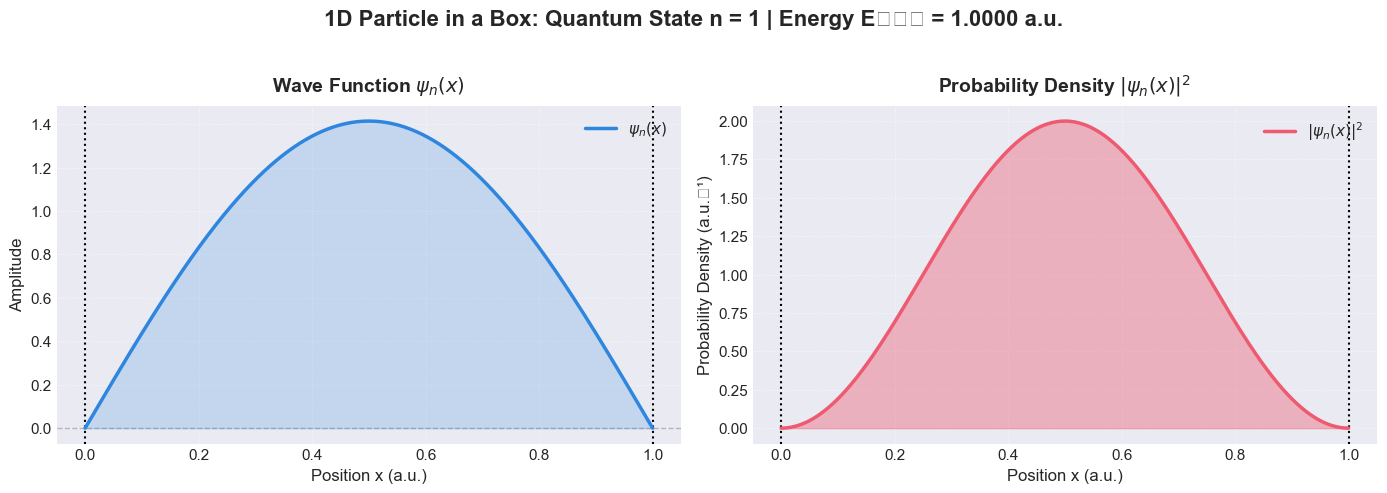


📊 QUANTUM STATE INFORMATION
  🔢 Quantum Number: n = 1
  ⚡ Energy Level: E₍1₎ = 1.000000 a.u.
  📏 Box Length: L = 1.0000 a.u.
  🎯 Number of Nodes: 0 (zero crossings inside the box)
  🌊 De Broglie Wavelength: λ = 2.0000 a.u.
  ✓ Normalization Check: ∫|ψ|²dx = 1.000000 (should be 1.0)
    Status: ✅ Properly normalized
  📍 Maximum Probability at: x = 0.4990 a.u.
     (Probability density = 2.0000 a.u.⁻¹)



In [10]:
# Ground state (n=1)
print("\n" + "="*80)
print("EXAMPLE 1A: GROUND STATE (n=1)")
print("="*80)
plot_piab(n=1, L=1.0)


EXAMPLE 1B: FIRST EXCITED STATE (n=2)


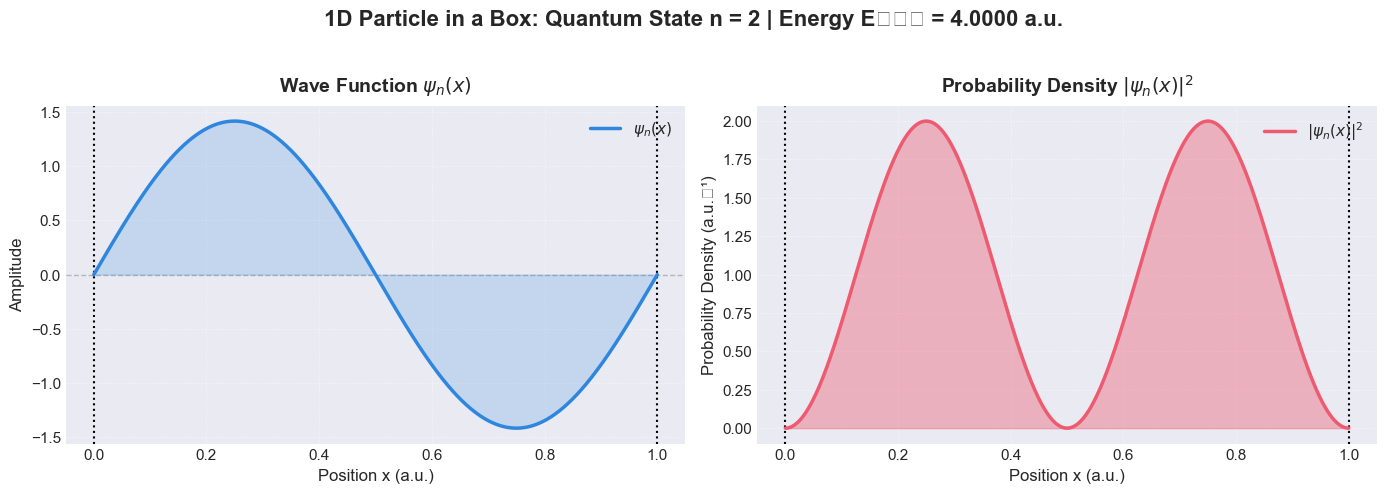


📊 QUANTUM STATE INFORMATION
  🔢 Quantum Number: n = 2
  ⚡ Energy Level: E₍2₎ = 4.000000 a.u.
  📏 Box Length: L = 1.0000 a.u.
  🎯 Number of Nodes: 1 (zero crossings inside the box)
  🌊 De Broglie Wavelength: λ = 1.0000 a.u.
  ✓ Normalization Check: ∫|ψ|²dx = 1.000000 (should be 1.0)
    Status: ✅ Properly normalized
  📍 Maximum Probability at: x = 0.2505 a.u.
     (Probability density = 2.0000 a.u.⁻¹)



In [11]:
# First excited state (n=2)
print("\n" + "="*80)
print("EXAMPLE 1B: FIRST EXCITED STATE (n=2)")
print("="*80)
plot_piab(n=2, L=1.0)


EXAMPLE 1C: HIGHER EXCITED STATE (n=5)


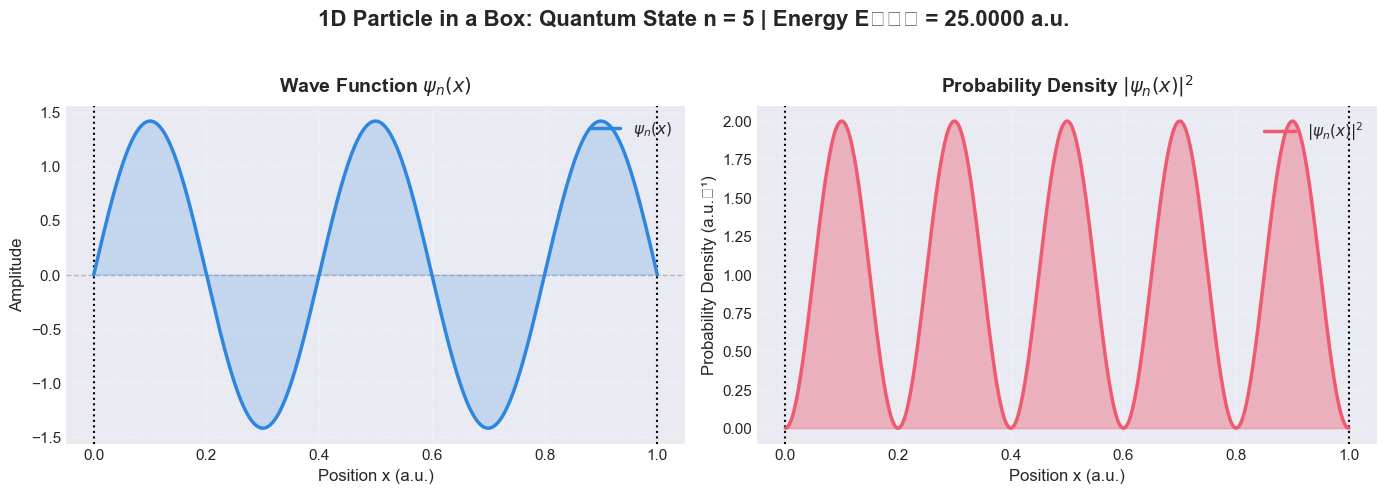


📊 QUANTUM STATE INFORMATION
  🔢 Quantum Number: n = 5
  ⚡ Energy Level: E₍5₎ = 25.000000 a.u.
  📏 Box Length: L = 1.0000 a.u.
  🎯 Number of Nodes: 4 (zero crossings inside the box)
  🌊 De Broglie Wavelength: λ = 0.4000 a.u.
  ✓ Normalization Check: ∫|ψ|²dx = 1.000000 (should be 1.0)
    Status: ✅ Properly normalized
  📍 Maximum Probability at: x = 0.1002 a.u.
     (Probability density = 2.0000 a.u.⁻¹)



In [12]:
# Higher excited state (n=5)
print("\n" + "="*80)
print("EXAMPLE 1C: HIGHER EXCITED STATE (n=5)")
print("="*80)
plot_piab(n=5, L=1.0)

## 📈 Example 2: Energy Level Diagram


EXAMPLE 2: ENERGY QUANTIZATION VISUALIZATION



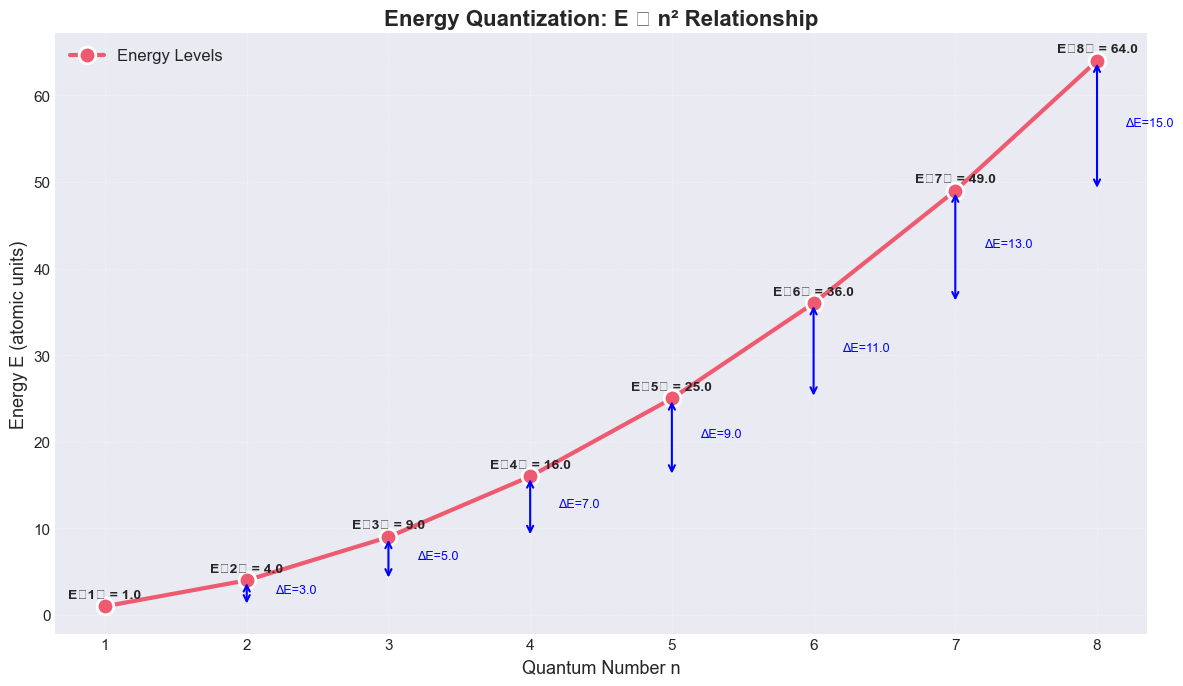


⚡ OBSERVATIONS:
   • Energy increases quadratically: E_n = n²
   • Energy gaps INCREASE with n: ΔE(n→n+1) = (2n+1)
     ΔE(1→2) = 3.0
     ΔE(2→3) = 5.0
     ΔE(3→4) = 7.0
     ΔE(4→5) = 9.0
     ΔE(5→6) = 11.0
     ΔE(6→7) = 13.0
     ΔE(7→8) = 15.0
   • Higher transitions require MORE energy (UV spectroscopy!)



In [13]:
print("\n" + "="*80)
print("EXAMPLE 2: ENERGY QUANTIZATION VISUALIZATION")
print("="*80 + "\n")

L_box = 1.0
n_values = np.arange(1, 9)
energies = [calculate_energy(n, L=L_box) for n in n_values]

plt.figure(figsize=(12, 7))
plt.plot(n_values, energies, 'o-', markersize=12, linewidth=3, 
         color='#EE5A6F', label='Energy Levels', markeredgecolor='white', 
         markeredgewidth=2)

# Add energy values as labels
for n, E in zip(n_values, energies):
    plt.text(n, E + 1, f'E₍{n}₎ = {E:.1f}', ha='center', 
             fontsize=10, fontweight='bold')

# Add energy differences
for i in range(len(n_values)-1):
    n1, n2 = n_values[i], n_values[i+1]
    E1, E2 = energies[i], energies[i+1]
    dE = E2 - E1
    plt.annotate('', xy=(n2, E1), xytext=(n2, E2),
                arrowprops=dict(arrowstyle='<->', color='blue', lw=1.5))
    plt.text(n2 + 0.2, (E1 + E2)/2, f'ΔE={dE:.1f}', 
            fontsize=9, color='blue')

plt.title('Energy Quantization: E ∝ n² Relationship', fontsize=16, fontweight='bold')
plt.xlabel('Quantum Number n', fontsize=13)
plt.ylabel('Energy E (atomic units)', fontsize=13)
plt.grid(True, linestyle='dotted', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print("\n⚡ OBSERVATIONS:")
print("   • Energy increases quadratically: E_n = n²")
print("   • Energy gaps INCREASE with n: ΔE(n→n+1) = (2n+1)")
for i in range(len(n_values)-1):
    print(f"     ΔE({n_values[i]}→{n_values[i+1]}) = {energies[i+1] - energies[i]:.1f}")
print("   • Higher transitions require MORE energy (UV spectroscopy!)\n")

## 🎯 Example 3: Probability Calculations


EXAMPLE 3: PROBABILITY IN DIFFERENT REGIONS



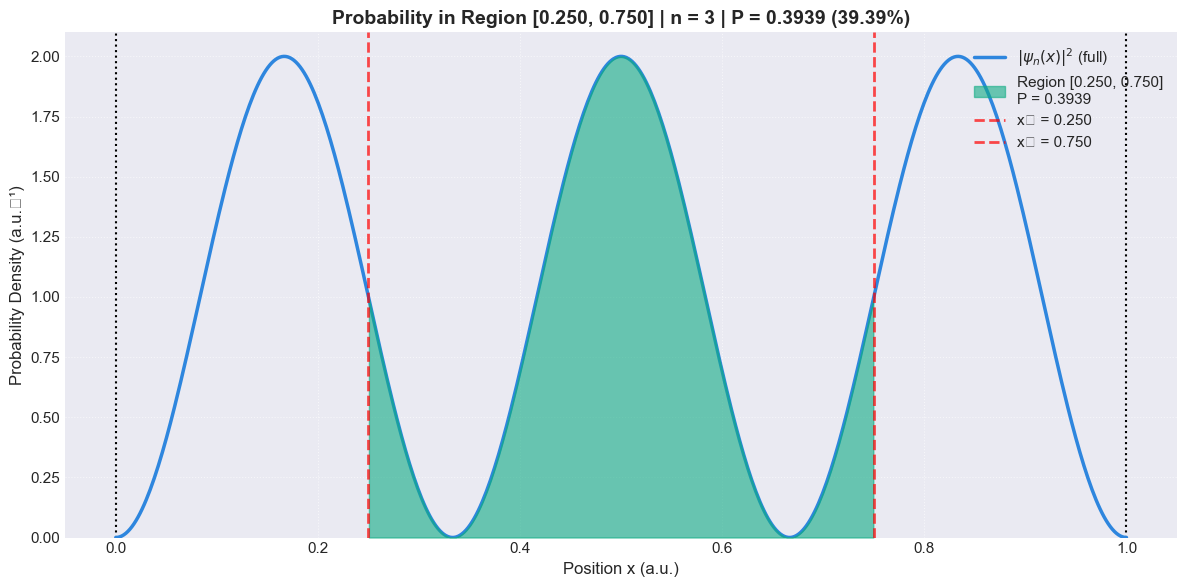


🎯 PROBABILITY CALCULATION RESULTS
  Quantum State: n = 3
  Box Length: L = 1.0000 a.u.
  Region: [0.2500, 0.7500] a.u.
  Region Width: Δx = 0.5000 a.u.

  📊 Results:
     Probability: P = 0.393897 (39.3897%)
     Integration Error: ±9.23e-14

  💡 Interpretation:
     There is a 39.39% chance of finding the particle
     in the region from x = 0.25 to x = 0.75



In [14]:
print("\n" + "="*80)
print("EXAMPLE 3: PROBABILITY IN DIFFERENT REGIONS")
print("="*80 + "\n")

# Analyze n=3 state
visualize_probability_region(n=3, L=1.0, x1=0.25, x2=0.75)

In [15]:
# Comparison of probabilities in quarters for n=4
print("\n" + "="*80)
print("PROBABILITY DISTRIBUTION ACROSS QUARTERS (n=4)")
print("="*80 + "\n")

n_state = 4
L_box = 1.0
quarters = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]
labels = ["First Quarter", "Second Quarter", "Third Quarter", "Fourth Quarter"]

probabilities = []
for (x1, x2), label in zip(quarters, labels):
    prob, err = calculate_probability_in_region(n_state, L_box, x1, x2)
    probabilities.append(prob)
    print(f"{label:20s} [{x1:.2f}, {x2:.2f}]: P = {prob:.4f} ({prob*100:5.2f}%)")

print(f"\n{'='*80}")
print(f"Total probability: {sum(probabilities):.6f} (should be 1.0)")
print(f"{'='*80}\n")


PROBABILITY DISTRIBUTION ACROSS QUARTERS (n=4)

First Quarter        [0.00, 0.25]: P = 0.2500 (25.00%)
Second Quarter       [0.25, 0.50]: P = 0.2500 (25.00%)
Third Quarter        [0.50, 0.75]: P = 0.2500 (25.00%)
Fourth Quarter       [0.75, 1.00]: P = 0.2500 (25.00%)

Total probability: 1.000000 (should be 1.0)



## 📐 Example 4: Expectation Values & Heisenberg Uncertainty

In [16]:
print("\n" + "="*80)
print("EXAMPLE 4: VERIFICATION OF HEISENBERG UNCERTAINTY PRINCIPLE")
print("="*80)

# Analyze multiple quantum states
for n in [1, 2, 3, 5]:
    print_expectation_values(n, L=1.0)


EXAMPLE 4: VERIFICATION OF HEISENBERG UNCERTAINTY PRINCIPLE

📐 EXPECTATION VALUES & UNCERTAINTIES (n = 1, L = 1.0)

  📍 POSITION STATISTICS:
     <x> (average position)     = 0.500000 a.u.
     <x²> (position² average)   = 0.282673 a.u.²
     Δx (position uncertainty)  = 0.180756 a.u.

     ✓ Note: <x> = 0.5000 (L/2) due to symmetry

  🚀 MOMENTUM STATISTICS:
     <p> (average momentum)     = 0.000000 a.u. (symmetry)
     Δp (momentum uncertainty)  = 3.141593 a.u.

  ⚡ ENERGY:
     <E> (energy expectation)   = 1.000000 a.u.

  🔬 HEISENBERG UNCERTAINTY PRINCIPLE:
     Δx × Δp                    = 0.567862
     Minimum (ℏ/2)              = 0.500000
     Ratio (Δx·Δp)/(ℏ/2)        = 1.1357

     ✅ Heisenberg uncertainty principle SATISFIED
        (Δx·Δp = 0.5679 >= 0.5000)



📐 EXPECTATION VALUES & UNCERTAINTIES (n = 2, L = 1.0)

  📍 POSITION STATISTICS:
     <x> (average position)     = 0.500000 a.u.
     <x²> (position² average)   = 0.320668 a.u.²
     Δx (position uncertainty)  = 0.26

## ⏱️ Example 5: Time Evolution & Superposition


EXAMPLE 5A: STATIONARY STATE (No Time Evolution)

⏱️  TIME EVOLUTION: Single Eigenstate (n = 2)

  Energy eigenstate: Probability density is TIME-INDEPENDENT
  |Ψ(x,t)|² = |ψ(x)|² (constant in time)

  This is a 'stationary state' - no time evolution visible!



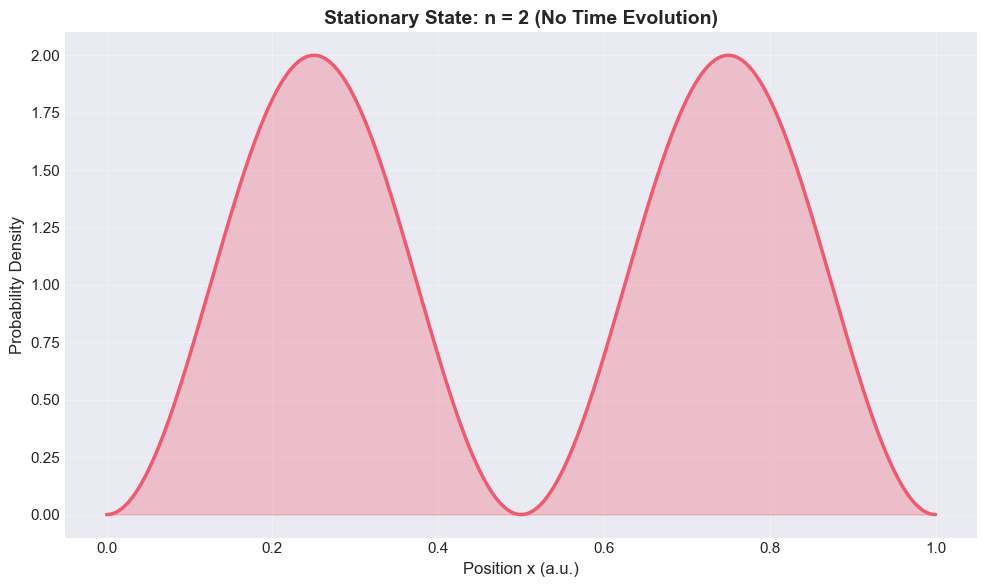

In [17]:
print("\n" + "="*80)
print("EXAMPLE 5A: STATIONARY STATE (No Time Evolution)")
print("="*80)

create_time_evolution_plot(n1=2, n2=None, L=1.0, t_max=10.0)


EXAMPLE 5B: SUPERPOSITION STATE (Quantum Interference!)

⏱️  TIME EVOLUTION: Superposition State (n = 1 + 2)

  Superposition: Ψ(x,t) = [ψ_1(x)e^(-iE_1t) + ψ_2(x)e^(-iE_2t)] / √2

  Energy difference: ΔE = E_2 - E_1 = 3.000000 a.u.
  Angular frequency: ω = ΔE/ℏ = 3.000000 rad/a.u.
  Oscillation period: T = 2π/ω = 2.094395 a.u.

  Watch the probability density OSCILLATE over time!



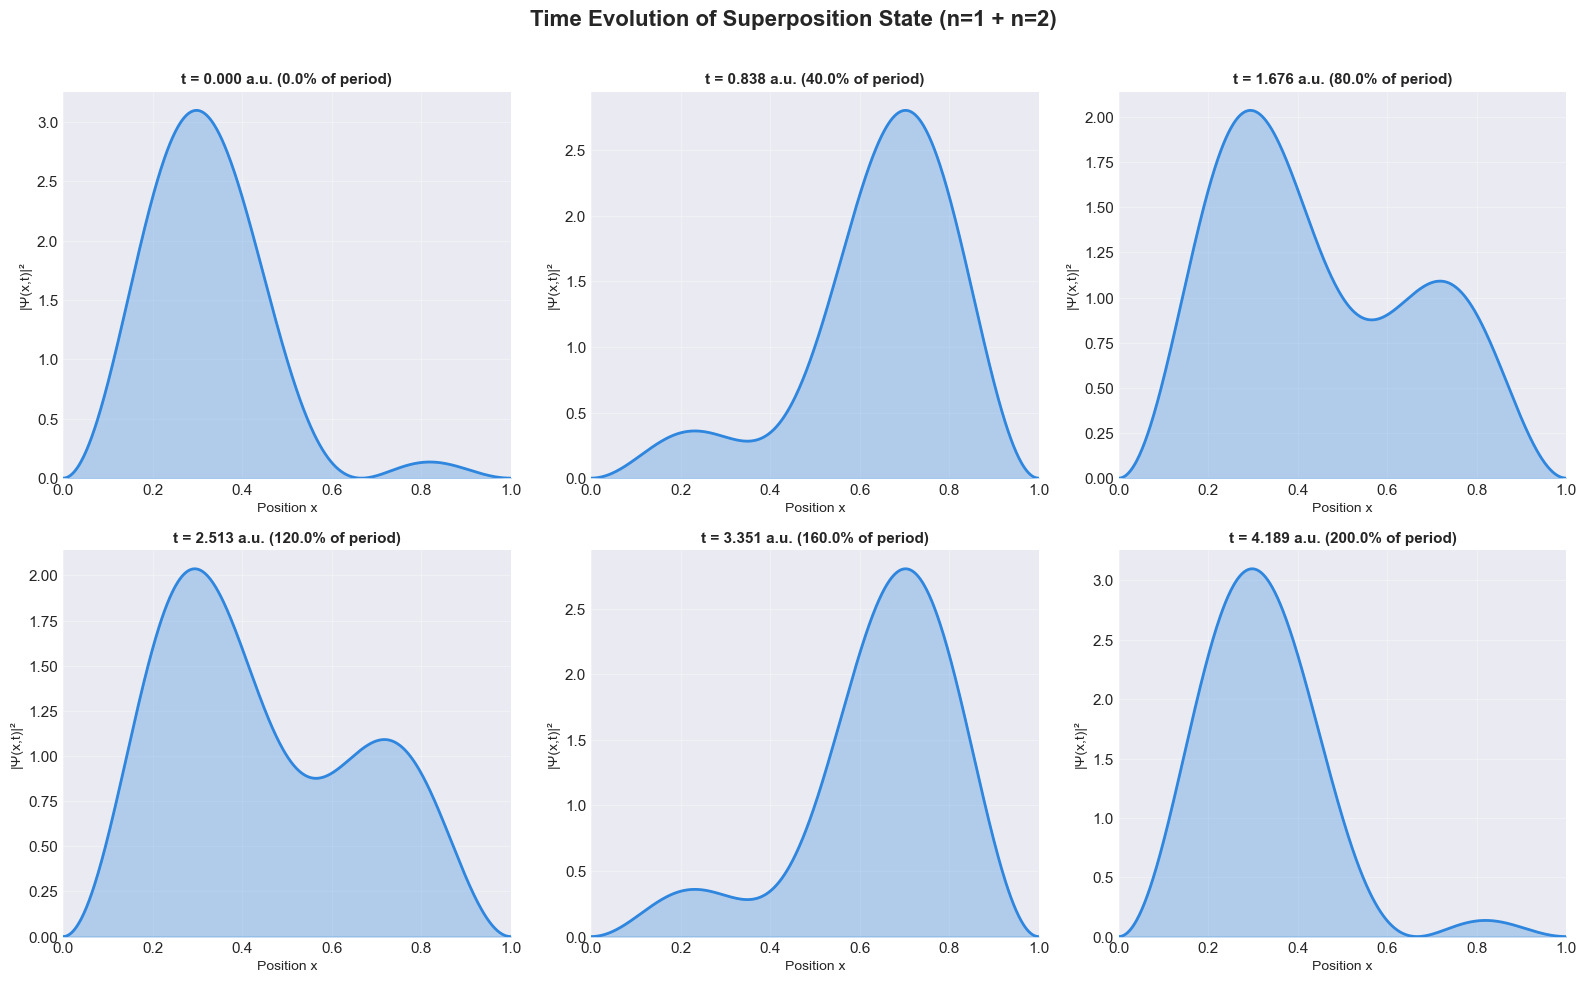


💡 OBSERVATION:
   The probability density oscillates with period T = 2.0944 a.u.
   This is pure quantum interference between the two states!



In [18]:
print("\n" + "="*80)
print("EXAMPLE 5B: SUPERPOSITION STATE (Quantum Interference!)")
print("="*80)

create_time_evolution_plot(n1=1, n2=2, L=1.0, t_max=15.0)

## 🧬 Example 6: Molecular Orbital Analysis

In [19]:
# Display theoretical connection
molecular_orbital_analogy_discussion()


🧪 MOLECULAR ORBITAL ANALOGY: From PIAB to Real Chemistry

📚 THE BIG PICTURE:
--------------------------------------------------------------------------------
The 1D Particle in a Box is more than abstract quantum mechanics - it's a
surprisingly accurate model for π-electrons in conjugated organic molecules!

Conjugated systems have alternating single and double bonds, allowing π-electrons
to 'delocalize' across multiple carbon atoms, behaving like a particle in a box.

🔗 THE PHYSICAL ANALOGY:
--------------------------------------------------------------------------------
  ┌─────────────────────────┬──────────────────────────────────────────────┐
  │ PIAB Model              │ Conjugated Molecular System                  │
  ├─────────────────────────┼──────────────────────────────────────────────┤
  │ Box Length (L)          │ Length of conjugated chain                   │
  │                         │ ≈ (N-1) × 1.4 Å (C-C bond length)           │
  │                         │ where 

In [20]:
print("\n" + "="*80)
print("EXAMPLE 6: HOMO-LUMO ANALYSIS FOR DIFFERENT MOLECULES")
print("="*80 + "\n")

# Analyze different polyenes
molecules = [
    (2, "Ethylene"),
    (4, "Butadiene"),
    (6, "Hexatriene"),
    (8, "Octatetraene"),
    (10, "Decapentaene")
]

results = []
for num_c, name in molecules:
    print(f"\n{'─'*80}")
    print(f"Analyzing: {name} (C{num_c}H{num_c+2})")
    print(f"{'─'*80}")
    result = analyze_homo_lumo(num_c)
    results.append(result)

# Summary comparison
print("\n" + "="*80)
print("📊 SUMMARY: Conjugation Length vs Absorption Wavelength")
print("="*80)
print(f"\n{'Molecule':<15} {'Carbons':<10} {'Gap (eV)':<12} {'λ_max (nm)':<15} {'Color'}")
print("─" * 80)
for (num_c, name), result in zip(molecules, results):
    print(f"{name:<15} {num_c:<10} {result['gap_eV']:<12.3f} {result['lambda_nm']:<15.1f} {result['color_region']}")

print("\n💡 TREND: Longer conjugation → Smaller gap → Longer wavelength → Visible color!\n")


EXAMPLE 6: HOMO-LUMO ANALYSIS FOR DIFFERENT MOLECULES


────────────────────────────────────────────────────────────────────────────────
Analyzing: Ethylene (C2H4)
────────────────────────────────────────────────────────────────────────────────

🧬 MOLECULAR ORBITAL ANALYSIS: C2H4 (Polyene Chain)

📏 MOLECULAR STRUCTURE:
   Number of carbon atoms: 2
   Conjugated chain length: 1.40 Å = 0.140 nm
   Number of π-electrons: 2

⚡ ENERGY LEVELS (PIAB Approximation):
   HOMO (n = 1): E = 19.1877 eV
   LUMO (n = 2): E = 76.7509 eV
   HOMO-LUMO Gap: ΔE = 57.5632 eV (9.222e-18 J)

🌈 UV-VIS SPECTROSCOPY PREDICTION:
   Maximum absorption: λ_max ≈ 21.6 nm
   Spectral region: UV (colorless)
   Absorbed color: UV light
   Observed color: COLORLESS (absorbs outside visible range)

💡 CHEMICAL INSIGHT:
   Short conjugation → Large ΔE → UV absorption → Colorless



────────────────────────────────────────────────────────────────────────────────
Analyzing: Butadiene (C4H6)
─────────────────────────────────

## 🔬 Example 7: Multi-State Comparison


EXAMPLE 7: COMPARISON OF FIRST 6 QUANTUM STATES



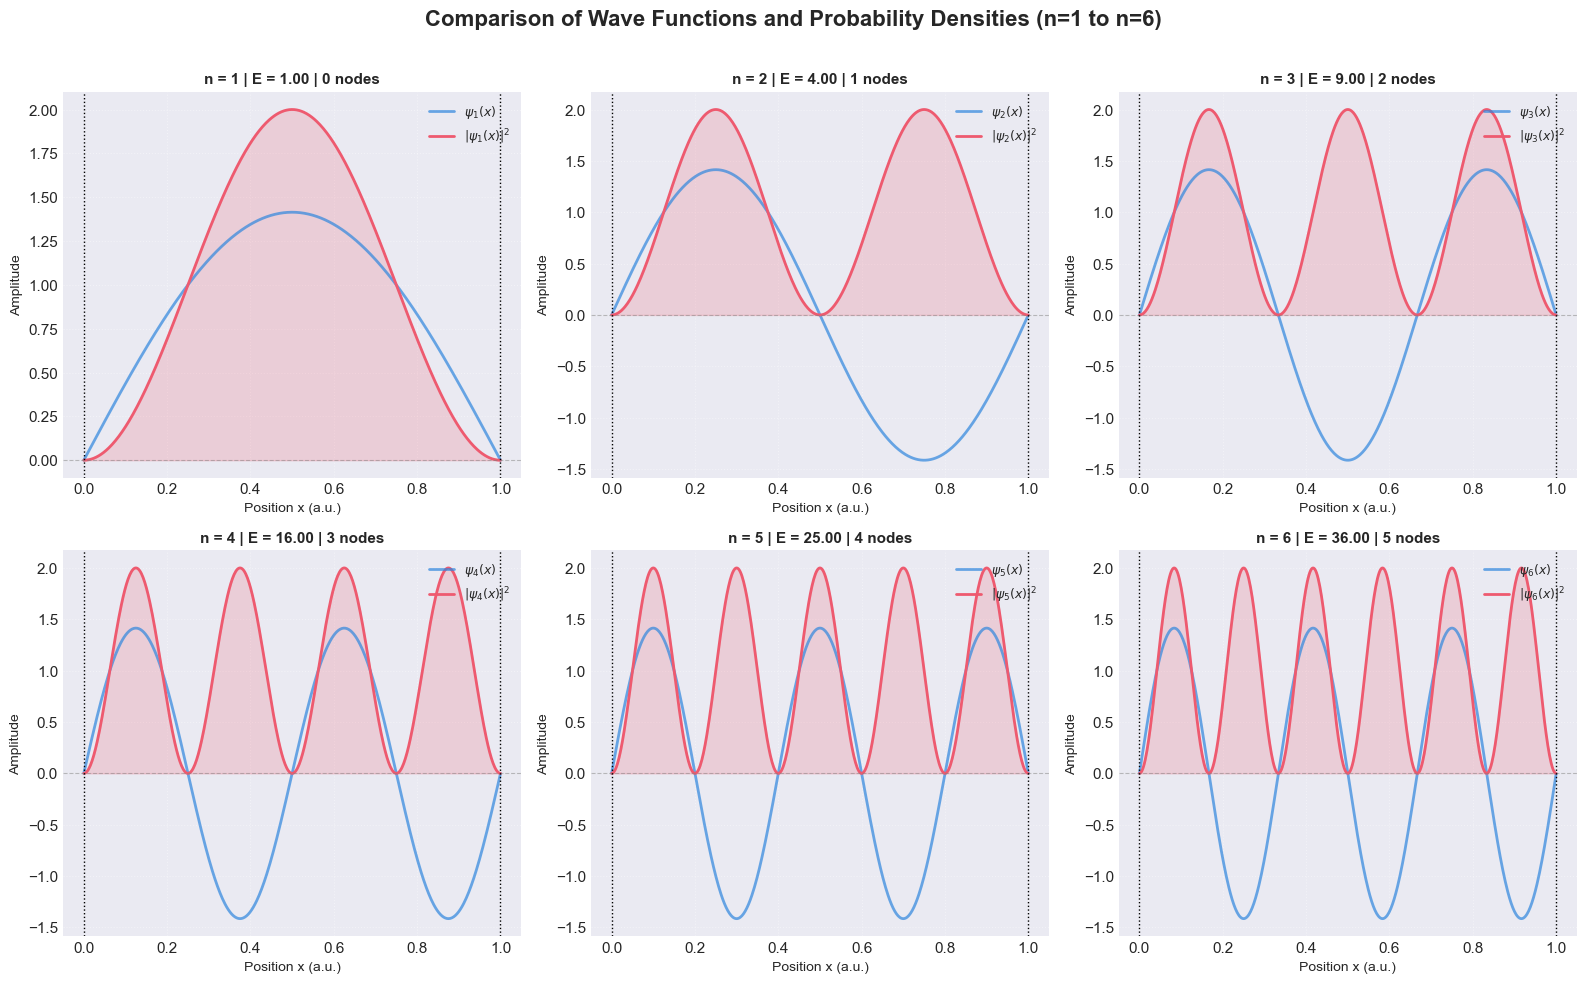


📊 KEY OBSERVATIONS:
   ✓ Number of nodes = n - 1
   ✓ Wavelength decreases with increasing n
   ✓ Energy increases as n² (quadratic scaling)
   ✓ All states are properly normalized (∫|ψ|²dx = 1)
   ✓ Wave function can be positive or negative
   ✓ Probability density is always positive



In [21]:
print("\n" + "="*80)
print("EXAMPLE 7: COMPARISON OF FIRST 6 QUANTUM STATES")
print("="*80 + "\n")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Comparison of Wave Functions and Probability Densities (n=1 to n=6)', 
             fontsize=16, fontweight='bold')

x = np.linspace(0, 1.0, 500)

for idx, n in enumerate([1, 2, 3, 4, 5, 6]):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    psi = calculate_wavefunction(x, n, 1.0)
    prob = calculate_probability_density(x, n, 1.0)
    E_n = calculate_energy(n, 1.0)
    
    # Plot both wave function and probability
    ax.plot(x, psi, linewidth=2, color='#2E86DE', label=r'$\psi_%d(x)$' % n, alpha=0.7)
    ax.plot(x, prob, linewidth=2, color='#EE5A6F', label=r'$|\psi_%d(x)|^2$' % n)
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.axvline(0, color='black', linestyle=':', linewidth=1)
    ax.axvline(1.0, color='black', linestyle=':', linewidth=1)
    ax.fill_between(x, prob, alpha=0.2, color='#EE5A6F')
    
    ax.set_title(f'n = {n} | E = {E_n:.2f} | {n-1} nodes', fontsize=11, fontweight='bold')
    ax.set_xlabel('Position x (a.u.)', fontsize=10)
    ax.set_ylabel('Amplitude', fontsize=10)
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(True, linestyle='dotted', alpha=0.4)
    ax.set_xlim(-0.05, 1.05)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

print("\n📊 KEY OBSERVATIONS:")
print("   ✓ Number of nodes = n - 1")
print("   ✓ Wavelength decreases with increasing n")
print("   ✓ Energy increases as n² (quadratic scaling)")
print("   ✓ All states are properly normalized (∫|ψ|²dx = 1)")
print("   ✓ Wave function can be positive or negative")
print("   ✓ Probability density is always positive\n")

## 💾 Example 8: Export Data for External Analysis

In [22]:
print("\n" + "="*80)
print("EXAMPLE 8: EXPORT QUANTUM DATA TO CSV")
print("="*80)

# Export data for n=3 state
filename = export_quantum_data(n=3, L=1.0, num_points=500)

# Load and display sample
df = pd.read_csv(filename)
print("\n📊 Sample of exported data (first 10 rows):")
print(df.head(10).to_string(index=False))
print("\n   ...")
print(f"\n   Total rows: {len(df)}")


EXAMPLE 8: EXPORT QUANTUM DATA TO CSV

✅ Data exported successfully!
   📄 File: quantum_state_n3_L1.0_data.csv
   📊 Rows: 500
   📈 Columns: ['position_x', 'wavefunction_psi', 'probability_density']
   🔢 Quantum number: n = 3
   ⚡ Energy: E = 9.000000 a.u.

   You can now open this file in Excel, Google Sheets, or Python!


📊 Sample of exported data (first 10 rows):
 position_x  wavefunction_psi  probability_density
   0.000000          0.000000             0.000000
   0.002004          0.026709             0.000713
   0.004008          0.053409             0.002852
   0.006012          0.080089             0.006414
   0.008016          0.106741             0.011394
   0.010020          0.133355             0.017784
   0.012024          0.159922             0.025575
   0.014028          0.186431             0.034756
   0.016032          0.212874             0.045315
   0.018036          0.239240             0.057236

   ...

   Total rows: 500


---
# 💻 CUSTOM INPUT SECTION

## 🎮 Your Turn to Explore!

Modify the parameters below to create your own quantum explorations:


YOUR CUSTOM QUANTUM STATE ANALYSIS


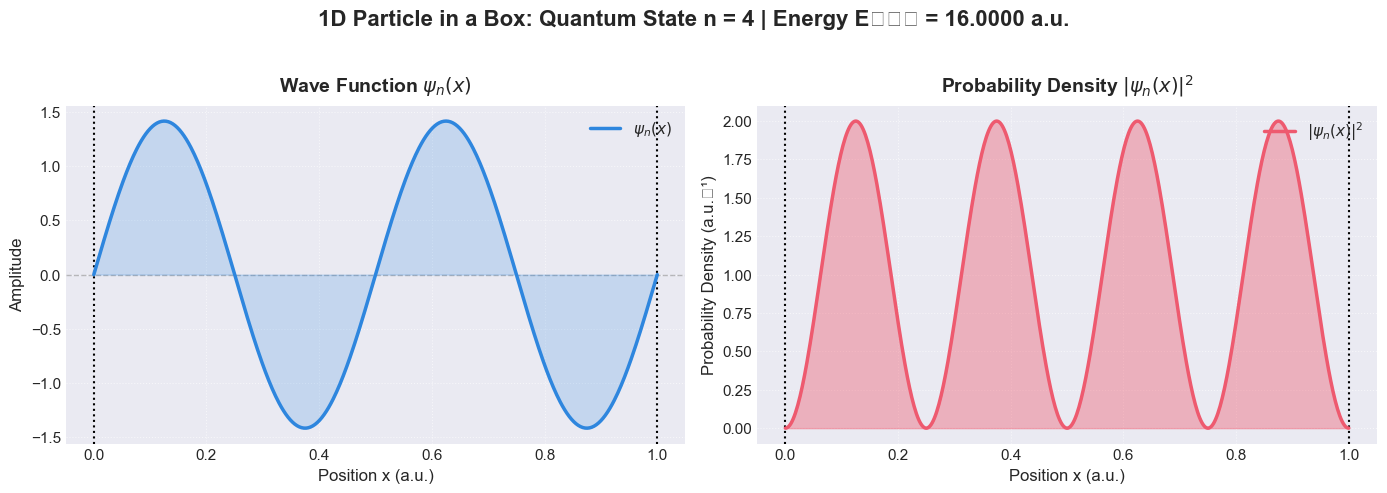


📊 QUANTUM STATE INFORMATION
  🔢 Quantum Number: n = 4
  ⚡ Energy Level: E₍4₎ = 16.000000 a.u.
  📏 Box Length: L = 1.0000 a.u.
  🎯 Number of Nodes: 3 (zero crossings inside the box)
  🌊 De Broglie Wavelength: λ = 0.5000 a.u.
  ✓ Normalization Check: ∫|ψ|²dx = 1.000000 (should be 1.0)
    Status: ✅ Properly normalized
  📍 Maximum Probability at: x = 0.3747 a.u.
     (Probability density = 2.0000 a.u.⁻¹)


📐 EXPECTATION VALUES & UNCERTAINTIES (n = 4, L = 1.0)

  📍 POSITION STATISTICS:
     <x> (average position)     = 0.500000 a.u.
     <x²> (position² average)   = 0.330167 a.u.²
     Δx (position uncertainty)  = 0.283138 a.u.

     ✓ Note: <x> = 0.5000 (L/2) due to symmetry

  🚀 MOMENTUM STATISTICS:
     <p> (average momentum)     = 0.000000 a.u. (symmetry)
     Δp (momentum uncertainty)  = 12.566371 a.u.

  ⚡ ENERGY:
     <E> (energy expectation)   = 16.000000 a.u.

  🔬 HEISENBERG UNCERTAINTY PRINCIPLE:
     Δx × Δp                    = 3.558015
     Minimum (ℏ/2)              = 0.5000

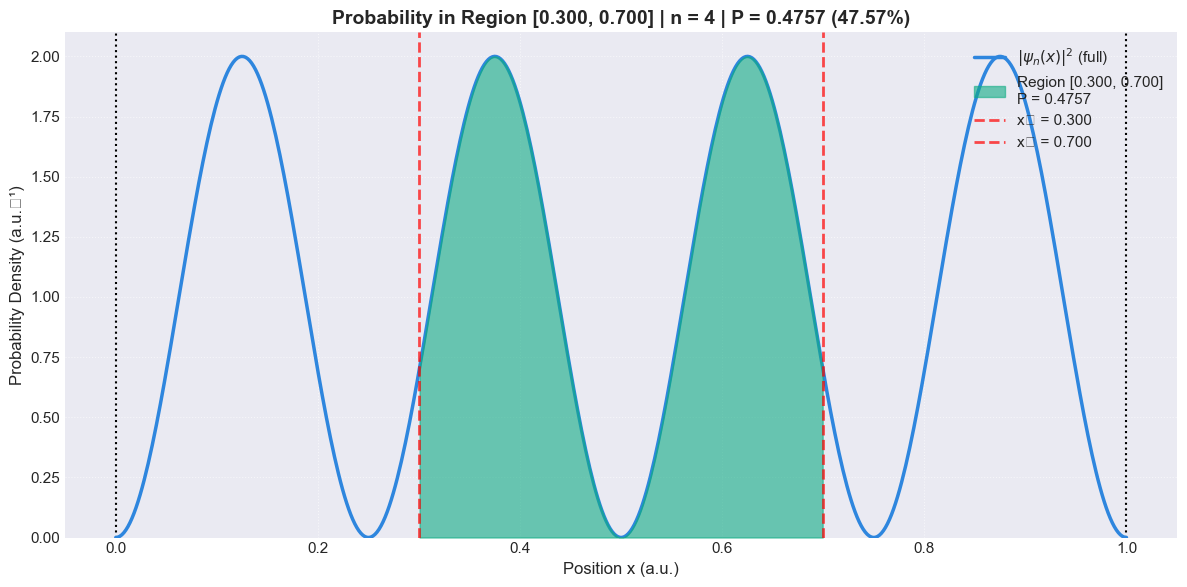


🎯 PROBABILITY CALCULATION RESULTS
  Quantum State: n = 4
  Box Length: L = 1.0000 a.u.
  Region: [0.3000, 0.7000] a.u.
  Region Width: Δx = 0.4000 a.u.

  📊 Results:
     Probability: P = 0.475683 (47.5683%)
     Integration Error: ±4.90e-13

  💡 Interpretation:
     There is a 47.57% chance of finding the particle
     in the region from x = 0.3 to x = 0.7


MOLECULAR ORBITAL ANALYSIS

🧬 MOLECULAR ORBITAL ANALYSIS: C8H10 (Polyene Chain)

📏 MOLECULAR STRUCTURE:
   Number of carbon atoms: 8
   Conjugated chain length: 9.80 Å = 0.980 nm
   Number of π-electrons: 8

⚡ ENERGY LEVELS (PIAB Approximation):
   HOMO (n = 4): E = 6.2654 eV
   LUMO (n = 5): E = 9.7897 eV
   HOMO-LUMO Gap: ΔE = 3.5243 eV (5.646e-19 J)

🌈 UV-VIS SPECTROSCOPY PREDICTION:
   Maximum absorption: λ_max ≈ 352.1 nm
   Spectral region: UV (colorless)
   Absorbed color: UV light
   Observed color: COLORLESS (absorbs outside visible range)

💡 CHEMICAL INSIGHT:
   Medium conjugation → Medium ΔE → Near-UV/Violet → Slightly 

{'num_carbons': 8,
 'num_pi_electrons': 8,
 'L_angstrom': 9.799999999999999,
 'L_m': 9.8e-10,
 'n_HOMO': 4,
 'n_LUMO': 5,
 'E_HOMO_eV': 6.26538111275387,
 'E_LUMO_eV': 9.789657988677922,
 'gap_eV': 3.524276875924052,
 'lambda_nm': 352.07902605895964,
 'color_region': 'UV (colorless)',
 'absorbed_color': 'UV light'}

In [23]:
# ============================================================
# CUSTOMIZE THESE PARAMETERS
# ============================================================

# 1. Choose quantum state
n_custom = 4  # Try: 1, 2, 3, 4, 5, 10, etc.

# 2. Set box length
L_custom = 1.0  # Try: 0.5, 1.0, 2.0

# 3. Define probability region
x1_custom = 0.3  # Start position
x2_custom = 0.7  # End position

# 4. Molecule for HOMO-LUMO analysis
num_carbons_custom = 8  # Try: 2, 4, 6, 8, 10, 12

# ============================================================

print("\n" + "="*80)
print("YOUR CUSTOM QUANTUM STATE ANALYSIS")
print("="*80)

# Visualize the state
plot_piab(n=n_custom, L=L_custom)

# Calculate expectation values
print_expectation_values(n=n_custom, L=L_custom)

# Probability in region
visualize_probability_region(n=n_custom, L=L_custom, x1=x1_custom, x2=x2_custom)

# Molecular analysis
print("\n" + "="*80)
print("MOLECULAR ORBITAL ANALYSIS")
print("="*80)
analyze_homo_lumo(num_carbons_custom)

## 📝 Summary & Key Takeaways

### ✅ What We have presented :

**Technical Skills**:
- ✓ Implemented numerical solutions to the Schrödinger equation
- ✓ Performed numerical integration with SciPy
- ✓ Created publication-quality visualizations with Matplotlib
- ✓ Managed and exported scientific data with Pandas
- ✓ Analyzed complex quantum phenomena (superposition, time evolution)

**Physics Understanding**:
- ✓ Energy quantization and discrete levels
- ✓ Wave-particle duality and probability interpretation
- ✓ Heisenberg uncertainty principle
- ✓ Time evolution and quantum interference
- ✓ Connection to real molecular systems

**Chemistry Applications**:
- ✓ π-electron conjugation in organic molecules
- ✓ HOMO-LUMO gaps and spectroscopy
- ✓ Structure-property relationships (color vs conjugation)
- ✓ Molecular orbital theory foundations

---

### 🔑 Key Physics Concepts:

| Concept | Mathematical Form | Physical Meaning |
|---------|-------------------|------------------|
| **Quantization** | E_n = n²π²ℏ²/(2mL²) | Only discrete energies allowed |
| **Wave Function** | ψ_n(x) = √(2/L)sin(nπx/L) | Amplitude of quantum state |
| **Probability** | P = ∫\_x1^x2 \|ψ\|² dx | Born interpretation |
| **Nodes** | # = n - 1 | Zero probability regions |
| **Normalization** | ∫\_0^L \|ψ\|² dx = 1 | Total probability = 100% |
| **Uncertainty** | Δx · Δp ≥ ℏ/2 | Heisenberg principle |
| **Time Evolution** | Ψ(x,t) = ψ(x)e^(-iEt/ℏ) | Phase oscillation |
| **Superposition** | Ψ = Σc_n ψ_n | Quantum interference |

---

**Real-World Applications**:
- Quantum dots and nanostructures
- Organic solar cells
- OLED displays
- Photosynthesis light harvesting
- Quantum computing qubits

---

### 📚 Further Learning Resources:

**Textbooks**:
- Griffiths, *Introduction to Quantum Mechanics*
- Levine, *Quantum Chemistry*
- Atkins & Friedman, *Molecular Quantum Mechanics*

**Online Courses**:
- MIT OpenCourseWare: Quantum Mechanics
- Coursera: Quantum Chemistry (various)
- edX: Quantum Physics courses

**Computational Resources**:
- SciPy documentation (scipy.org)
- Matplotlib gallery (matplotlib.org)
- QuantumPy libraries

---

### 💬 Final Thoughts:

This notebook demonstrates that quantum mechanics, while mathematically sophisticated, can be understood through **computational exploration**. The PIAB model is beautifully simple yet captures the **essence** of quantum behavior:

🔹 **Quantization** - Not all values allowed  
🔹 **Wave-Particle Duality** - Particles exhibit wave properties  
🔹 **Probability** - Predictions are statistical  
🔹 **Confinement** - Smaller boxes → higher energies  

These principles extend far beyond the simple box - they govern atoms, molecules, semiconductors, and even the universe itself!

---

**Created for Quantum Mechanics Education**  
*Combining rigorous theory with hands-on computation*

⚛️ *"Nature isn't classical, dammit, and if you want to make a simulation of nature, you'd better make it quantum mechanical."*  
― Richard Feynman

---

### 🎯 Project Checklist:

-  Energy eigenvalue calculator
- Wave function computation
- Probability density visualization
- Numerical probability integration
- Expectation values & uncertainties
- Heisenberg principle verification
- Time evolution visualization
- Superposition states
- Molecular orbital connection
- HOMO-LUMO spectroscopy
- Data export capabilities
- Comprehensive documentation
- Interactive examples


---

*Thank you for exploring quantum mechanics with this notebook! Feel free to modify, extend, and share your discoveries.* 🚀